In [1]:
import pandas as pd

# Wczytanie danych o pożyczkach
loan_data_path = 'Loan_data.csv'
loan_data = pd.read_csv(loan_data_path)

# Wczytanie słownika danych
data_dictionary_path = 'LCDataDictionary.csv'
data_dictionary = pd.read_csv(data_dictionary_path)

# Wyświetlenie kilku pierwszych wierszy z każdego zestawu danych
loan_data.head(), data_dictionary.head()


C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\770158518.py:5: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(loan_data_path)


(        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
 0  1077501        NaN     5000.0       5000.0           4975.0   36 months   
 1  1077430        NaN     2500.0       2500.0           2500.0   60 months   
 2  1077175        NaN     2400.0       2400.0           2400.0   36 months   
 3  1076863        NaN    10000.0      10000.0          10000.0   36 months   
 4  1075358        NaN     3000.0       3000.0           3000.0   60 months   
 
   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
 0   10.65%       162.87     B        B2  ...                            NaN   
 1   15.27%        59.83     C        C4  ...                            NaN   
 2   15.96%        84.33     C        C5  ...                            NaN   
 3   13.49%       339.31     C        C1  ...                            NaN   
 4   12.69%        67.79     B        B5  ...                            NaN   
 
   hardship_last_payment_amount disburseme

In [2]:
# Analiza brakujących danych
missing_data = loan_data.isnull().sum().sort_values(ascending=False)
missing_data_percentage = (loan_data.isnull().mean() * 100).sort_values(ascending=False)

# Połączenie liczby brakujących danych i ich procentowej ilości w jednym DataFrame
missing_info = pd.DataFrame({"Missing Values": missing_data, "Percentage": missing_data_percentage})

# Wyświetlenie kolumn, dla których brakuje danych
missing_info[missing_info["Missing Values"] > 0].head(10)


,Missing Values,Percentage
inq_fi,42536,100.0
mths_since_recent_revol_delinq,42536,100.0
open_acc_6m,42536,100.0
tot_cur_bal,42536,100.0
tot_coll_amt,42536,100.0
mths_since_recent_bc_dlq,42536,100.0
verification_status_joint,42536,100.0
dti_joint,42536,100.0
annual_inc_joint,42536,100.0
mths_since_recent_inq,42536,100.0


In [3]:
# Usunięcie kolumn, w których wszystkie wartości są brakujące
loan_data_cleaned = loan_data.dropna(axis=1, how='all')

# Sprawdzenie, ile kolumn pozostało po usunięciu
remaining_columns = loan_data_cleaned.shape[1]

remaining_columns


69

In [4]:
# Sprawdzenie typów danych w kolumnach
data_types = loan_data_cleaned.dtypes

# Wyświetlenie kilku pierwszych
data_types.head(10)


id                  object
loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
term                object
int_rate            object
installment        float64
grade               object
sub_grade           object
emp_title           object
dtype: object

In [5]:
# Usunięcie znaków procentowych z kolumny 'int_rate' i konwersja na float
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.rstrip('%').astype('float') / 100.0

# Usunięcie słów 'months' z kolumny 'term' i konwersja na int
loan_data_cleaned['term'] = loan_data_cleaned['term'].str.extract('(\d+)').astype('float')

# Sprawdzenie, czy konwersja się powiodła
loan_data_cleaned[['term', 'int_rate']].dtypes


C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\787537453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.rstrip('%').astype('float') / 100.0
C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\787537453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cleaned['term'] = loan_data_cleaned['term'].str.extract('(\d+)').astype('float')


term        float64
int_rate    float64
dtype: object

In [8]:
import pandas as pd

# Wczytanie danych
loan_data_path = 'Loan_data.csv'
loan_data = pd.read_csv(loan_data_path)

# Usunięcie kolumn zawierających informacje z przyszłości
columns_to_drop = [col for col in loan_data.columns if 'future' in col.lower() or 'future_date' in col.lower()]
loan_data = loan_data.drop(columns=columns_to_drop)

# Usunięcie kolumn ze zbędnymi informacjami
columns_to_drop = ['url', 'desc', 'title', 'addr_state', 'zip_code', 'emp_title']
loan_data = loan_data.drop(columns=columns_to_drop)

# Usunięcie kolumn, które mają tylko jedną unikalną wartość
columns_with_one_unique_value = [col for col in loan_data.columns if loan_data[col].nunique() == 1]
loan_data = loan_data.drop(columns=columns_with_one_unique_value)

# Analiza brakujących wartości
missing_data = loan_data.isnull().sum().sort_values(ascending=False)
missing_data_percentage = (loan_data.isnull().mean() * 100).sort_values(ascending=False)

# Określenie kryteriów uzupełniania lub usuwania brakujących danych
# Zakłada się, że jeśli kolumna ma więcej niż 50% brakujących danych, to zostanie usunięta, w przeciwnym razie zostanie uzupełniona.

# Określenie progu brakujących danych, powyżej którego usuwamy kolumnę
missing_data_threshold = 50

# Usunięcie kolumn, które mają więcej niż 50% brakujących danych
columns_to_drop = missing_data[missing_data_percentage > missing_data_threshold].index
loan_data = loan_data.drop(columns=columns_to_drop)

# Uzupełnienie brakujących danych w pozostałych kolumnach
# Zakłada się, że brakujące dane w kolumnach numerycznych zostaną uzupełnione medianą, a w kolumnach tekstowych zostaną usunięte
numerical_columns = loan_data.select_dtypes(include=['number']).columns
text_columns = loan_data.select_dtypes(include=['object']).columns

loan_data[numerical_columns] = loan_data[numerical_columns].fillna(loan_data[numerical_columns].median())
loan_data[text_columns] = loan_data[text_columns].fillna('')


loan_data.to_csv('cleaned_loan_data.csv', index=False)

C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\814571448.py:5: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(loan_data_path)


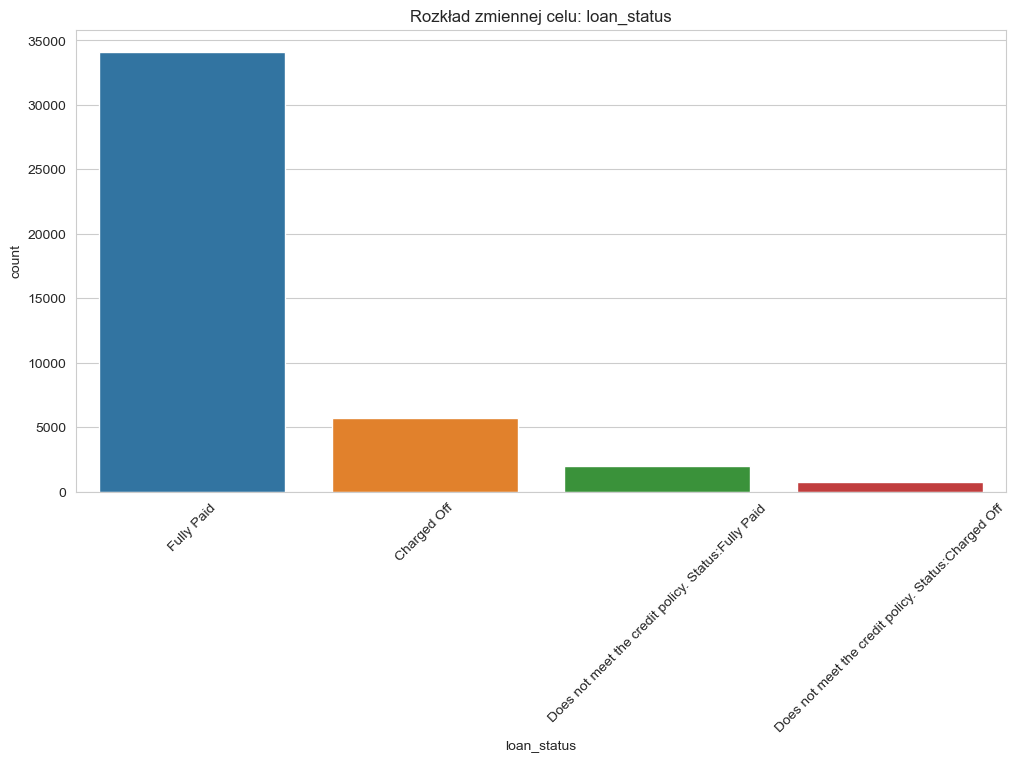

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienie stylu wykresów
sns.set_style("whitegrid")

# Wykres dla zmiennej celu 'loan_status'
plt.figure(figsize=(12, 6))
sns.countplot(data=loan_data_cleaned, x='loan_status', order=loan_data_cleaned['loan_status'].value_counts().index)
plt.title('Rozkład zmiennej celu: loan_status')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Filtrowanie danych, aby zawierały tylko interesujące nas kategorie w kolumnie 'loan_status'
loan_data_filtered = loan_data_cleaned[loan_data_cleaned['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Zamiana etykiet na binarne wartości: 'Fully Paid' na 1 i 'Charged Off' na 0
loan_data_filtered['loan_status'] = loan_data_filtered['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

# Sprawdzenie, czy operacja się powiodła
loan_data_filtered['loan_status'].value_counts()


C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\888060918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_filtered['loan_status'] = loan_data_filtered['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})


1    34116
0     5670
Name: loan_status, dtype: int64

# 1. Analiza kolumny loan_amnt (Kwota pożyczki)

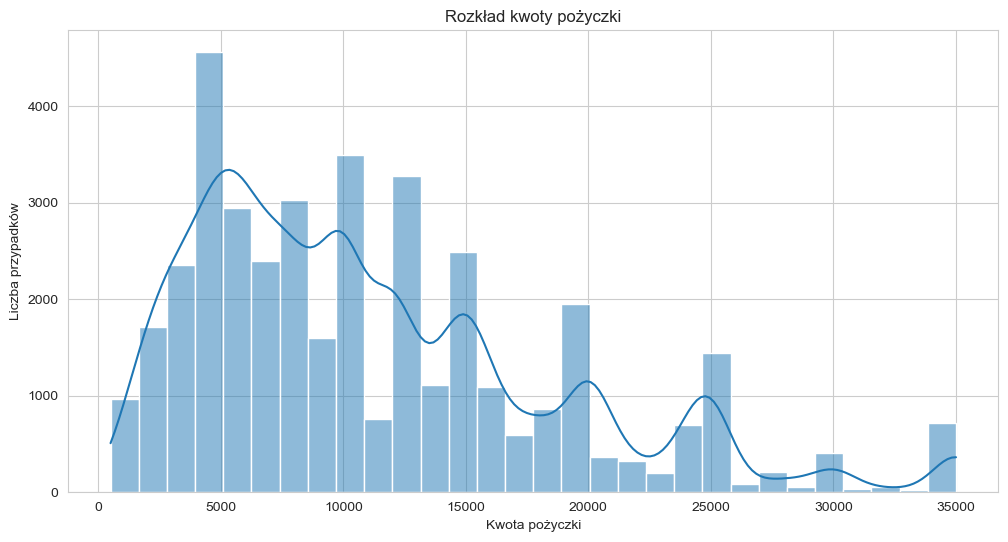

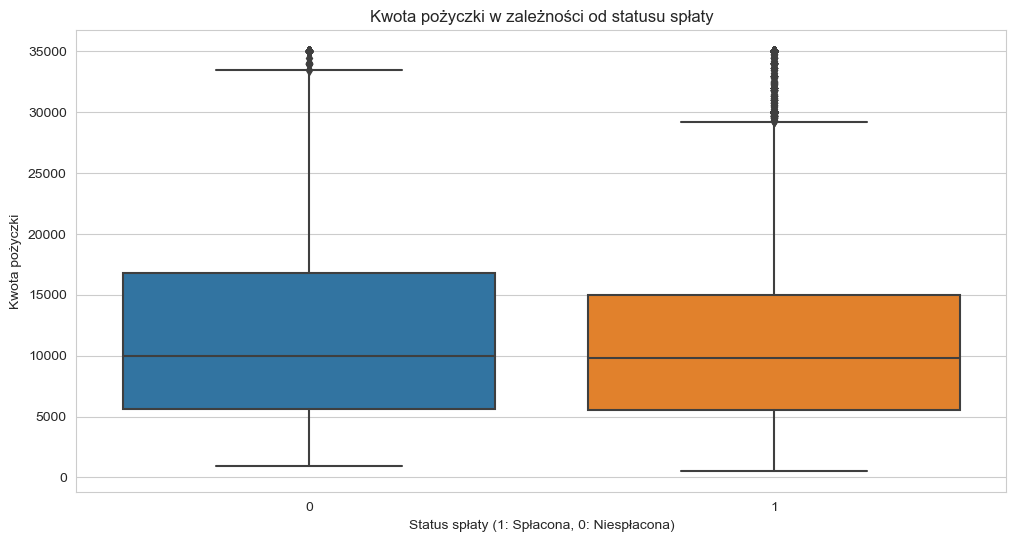

In [11]:
# Wykres rozkładu kwoty pożyczki
plt.figure(figsize=(12, 6))
sns.histplot(loan_data_filtered['loan_amnt'], bins=30, kde=True)
plt.title('Rozkład kwoty pożyczki')
plt.xlabel('Kwota pożyczki')
plt.ylabel('Liczba przypadków')
plt.show()

# Wykres pudełkowy dla kwoty pożyczki w zależności od statusu spłaty
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_filtered)
plt.title('Kwota pożyczki w zależności od statusu spłaty')
plt.xlabel('Status spłaty (1: Spłacona, 0: Niespłacona)')
plt.ylabel('Kwota pożyczki')
plt.show()


Wnioski dla kolumny loan_amnt:
Rozkład kwoty pożyczki: Rozkład kwoty pożyczki jest prawoskośny. Większość pożyczek ma wartość poniżej 15 000 USD.
Kwota pożyczki a status spłaty: Z wykresu pudełkowego wynika, że mediany kwot pożyczek są podobne dla spłaconych i niespłaconych pożyczek. Nie widać znaczącej różnicy, co sugeruje, że sama kwota pożyczki nie jest mocnym wskaźnikiem zdolności do jej spłaty.

In [12]:
from scipy.stats import ttest_ind

# Grupy danych: spłacone i niespłacone pożyczki
fully_paid = loan_data_filtered[loan_data_filtered['loan_status'] == 1]['loan_amnt']
charged_off = loan_data_filtered[loan_data_filtered['loan_status'] == 0]['loan_amnt']

# Przeprowadzenie t-testu
t_stat, p_value = ttest_ind(fully_paid, charged_off)

t_stat, p_value


(-9.992422364196793, 1.753479937936575e-23)

Wyniki t-testu dla kolumny loan_amnt:

t-statystyka: −9.99

p-wartość: 1.75×10^−23
 
Ponieważ p-wartość jest znacznie mniejsza od 0,05, możemy odrzucić hipotezę zerową i stwierdzić, że różnice w kwotach pożyczek dla spłaconych i niespłaconych pożyczek są statystycznie istotne, mimo że na wykresie pudełkowym różnice te wydają się niewielkie.

# 2. Analiza kolumny term (Okres kredytowania)

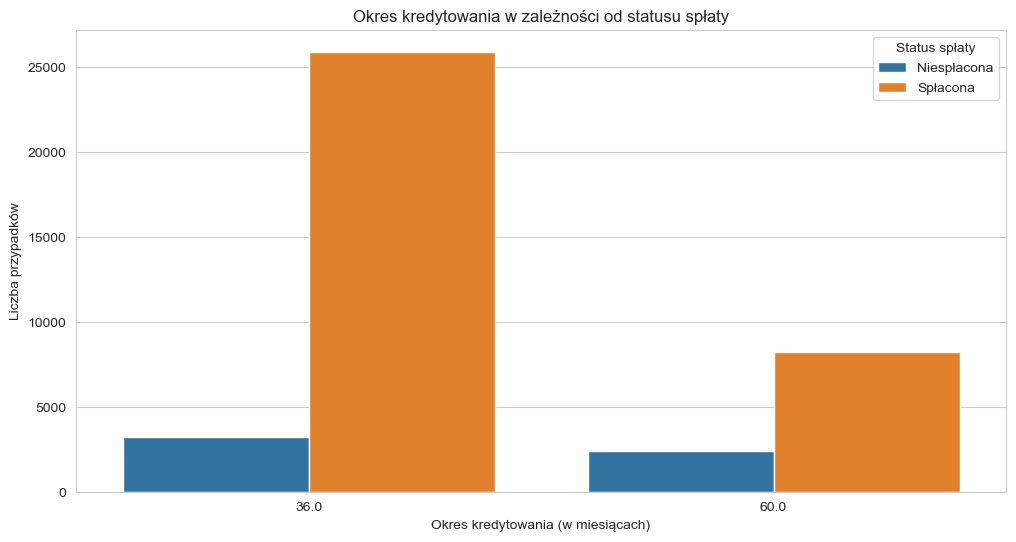

In [12]:
# Wykres słupkowy dla okresu kredytowania
plt.figure(figsize=(12, 6))
sns.countplot(x='term', hue='loan_status', data=loan_data_filtered)
plt.title('Okres kredytowania w zależności od statusu spłaty')
plt.xlabel('Okres kredytowania (w miesiącach)')
plt.ylabel('Liczba przypadków')
plt.legend(title='Status spłaty', labels=['Niespłacona', 'Spłacona'])
plt.show()


Wnioski dla kolumny term:
Okres kredytowania a status spłaty: Wyraźnie widać, że pożyczki na okres 36 miesięcy mają wyższą liczbę spłaconych pożyczek w porównaniu do pożyczek na okres 60 miesięcy. Dla pożyczek na 60 miesięcy różnica między liczbą spłaconych i niespłaconych pożyczek jest znacznie mniejsza.
To sugeruje, że krótszy okres kredytowania może być związany z większą szansą na spłatę pożyczki.

In [13]:
from scipy.stats import chi2_contingency

# Tabela kontyngencji dla 'term' i 'loan_status'
contingency_table = pd.crosstab(loan_data_filtered['term'], loan_data_filtered['loan_status'])

# Przeprowadzenie testu Chi-kwadrat
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value


(884.1162942885429, 2.7847200489779636e-194)

Wyniki testu Chi-kwadrat dla kolumny term: 

χ2-statystyka: 884.12

p-wartość: 2.78×10^−194
 
Ponieważ p-wartość jest znacznie mniejsza od 0,05, możemy odrzucić hipotezę zerową i stwierdzić, że różnice w okresach kredytowania dla spłaconych i niespłaconych pożyczek są statystycznie istotne. Krótszy okres kredytowania jest związany z większą szansą na spłatę pożyczki.

# 3. Analiza kolumny int_rate (Oprocentowanie)

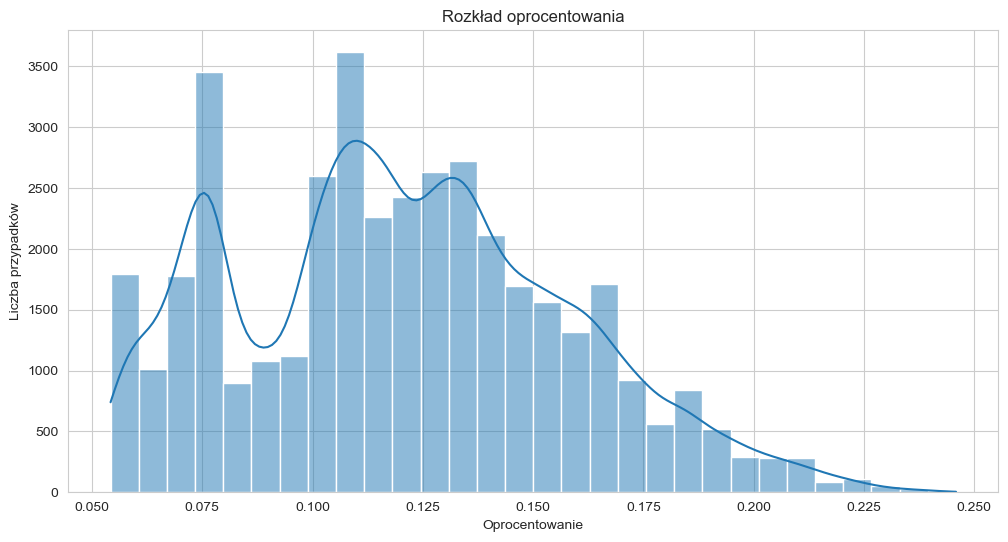

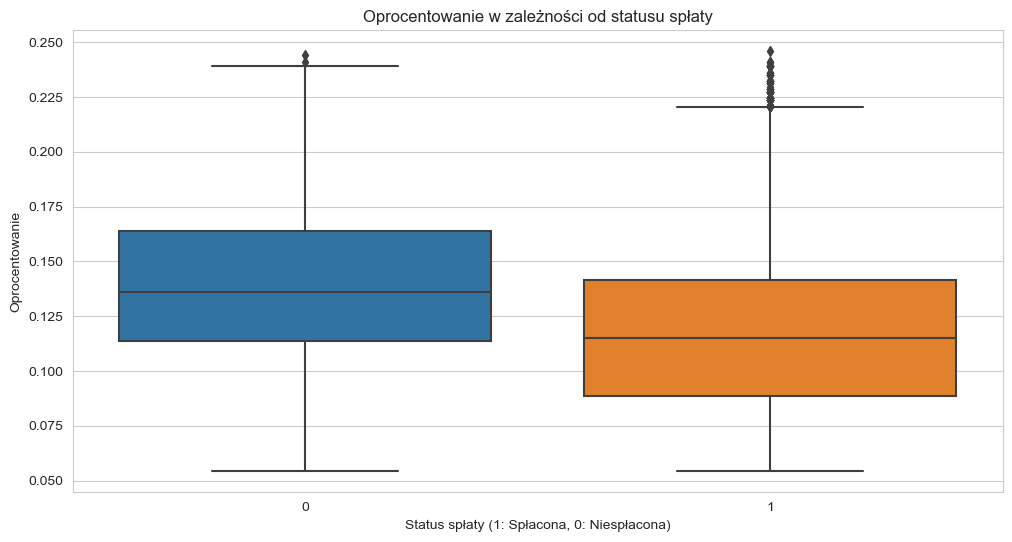

In [14]:
# Wykres rozkładu oprocentowania
plt.figure(figsize=(12, 6))
sns.histplot(loan_data_filtered['int_rate'], bins=30, kde=True)
plt.title('Rozkład oprocentowania')
plt.xlabel('Oprocentowanie')
plt.ylabel('Liczba przypadków')
plt.show()

# Wykres pudełkowy dla oprocentowania w zależności od statusu spłaty
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_data_filtered)
plt.title('Oprocentowanie w zależności od statusu spłaty')
plt.xlabel('Status spłaty (1: Spłacona, 0: Niespłacona)')
plt.ylabel('Oprocentowanie')
plt.show()


Wnioski dla kolumny int_rate:
Rozkład oprocentowania: Rozkład oprocentowania jest również prawoskośny. Większość pożyczek ma oprocentowanie poniżej 0,2 (20%).

Oprocentowanie a status spłaty: Z wykresu pudełkowego wynika, że pożyczki, które nie zostały spłacone, mają generalnie wyższe oprocentowanie. To jest zgodne z intuicją, że wyższe oprocentowanie może utrudniać spłatę pożyczki.

In [15]:
# Grupy danych: spłacone i niespłacone pożyczki
fully_paid_rate = loan_data_filtered[loan_data_filtered['loan_status'] == 1]['int_rate']
charged_off_rate = loan_data_filtered[loan_data_filtered['loan_status'] == 0]['int_rate']

# Przeprowadzenie t-testu
t_stat_rate, p_value_rate = ttest_ind(fully_paid_rate, charged_off_rate)

t_stat_rate, p_value_rate


(-40.27328660272157, 0.0)

Wyniki t-testu dla kolumny int_rate:

t-statystyka: −40.27

p-wartość: 0.0

Ponieważ p-wartość jest równa 0, możemy odrzucić hipotezę zerową i stwierdzić, że różnice w oprocentowaniu dla spłaconych i niespłaconych pożyczek są statystycznie istotne. Wyższe oprocentowanie jest związane z większym ryzykiem niespłacenia pożyczki.

# 4. Analiza kolumny grade (Ocena pożyczkobiorcy)

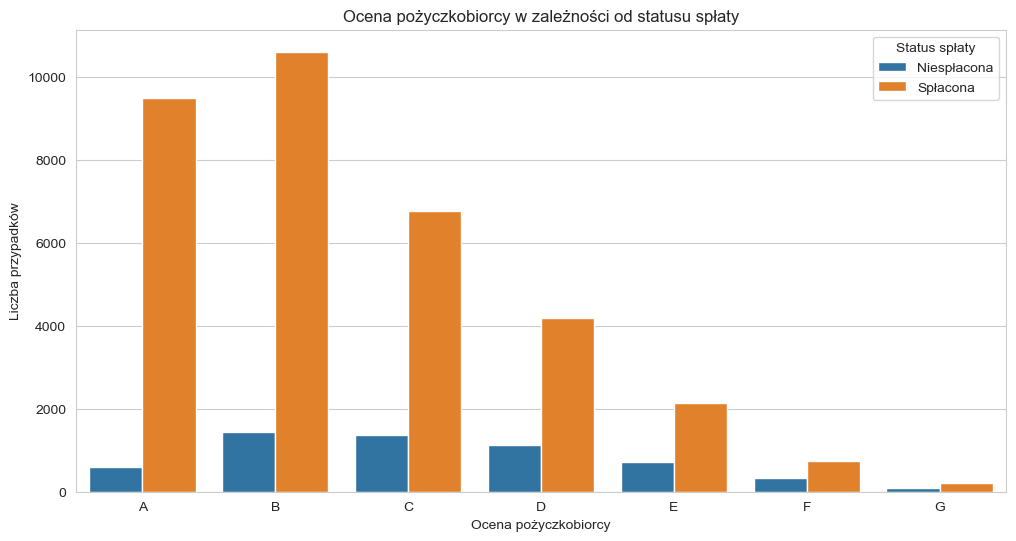

In [16]:
# Wykres słupkowy dla oceny pożyczkobiorcy
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status', data=loan_data_filtered, order=sorted(loan_data_filtered['grade'].unique()))
plt.title('Ocena pożyczkobiorcy w zależności od statusu spłaty')
plt.xlabel('Ocena pożyczkobiorcy')
plt.ylabel('Liczba przypadków')
plt.legend(title='Status spłaty', labels=['Niespłacona', 'Spłacona'])
plt.show()


Wnioski dla kolumny grade:
Ocena pożyczkobiorcy a status spłaty: Wyraźnie widać, że pożyczki z wyższą oceną (od 'A' do 'G') mają większą liczbę spłaconych pożyczek w porównaniu do niespłaconych. Dla niższych ocen różnica ta jest mniejsza lub nawet odwraca się (jak w przypadku oceny 'G').
To sugeruje, że wyższa ocena jest związana z większą szansą na spłatę pożyczki.

In [17]:
# Tabela kontyngencji dla 'grade' i 'loan_status'
contingency_table_grade = pd.crosstab(loan_data_filtered['grade'], loan_data_filtered['loan_status'])

# Przeprowadzenie testu Chi-kwadrat
chi2_grade, p_value_grade, dof_grade, expected_grade = chi2_contingency(contingency_table_grade)

chi2_grade, p_value_grade


(1472.8151482209478, 0.0)

Wyniki testu Chi-kwadrat dla kolumny grade:

χ2-statystyka: 1472.82

p-wartość: 0.0

Ponieważ p-wartość jest równa 0, możemy odrzucić hipotezę zerową i stwierdzić, że różnice w ocenach dla spłaconych i niespłaconych pożyczek są statystycznie istotne.

# 5. Analiza kolumny annual_inc (Roczny dochód)

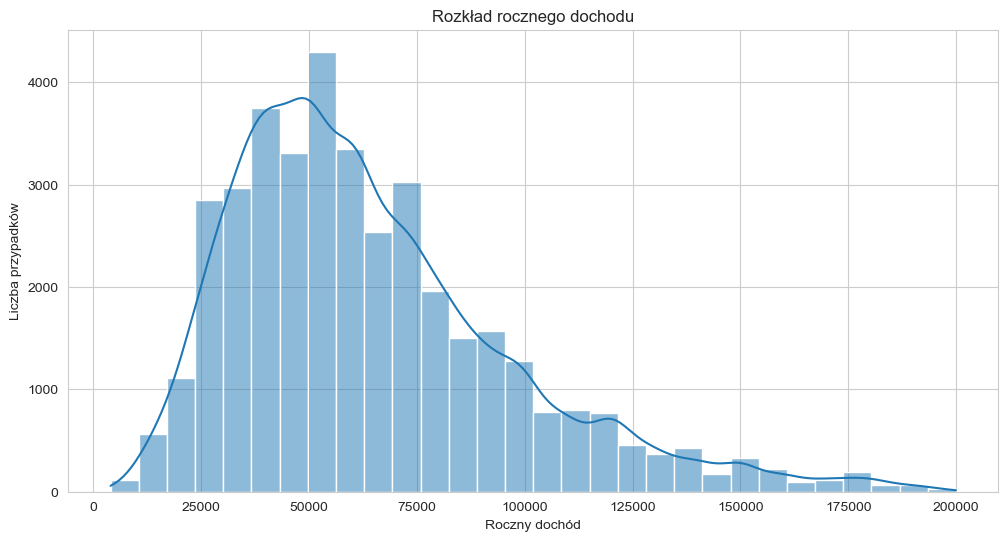

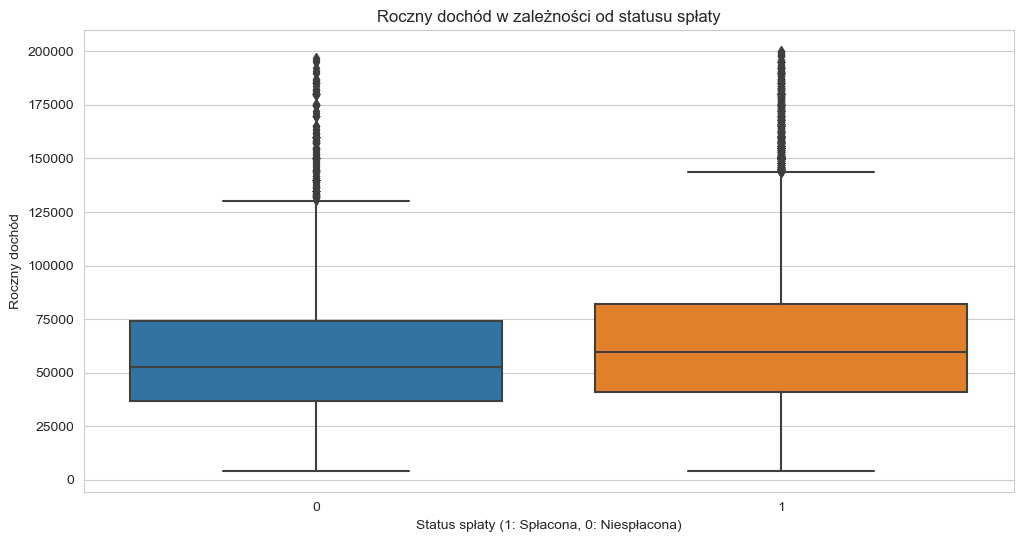

In [18]:
# Wykres rozkładu rocznego dochodu (ograniczenie do 200,000 dla lepszej wizualizacji)
plt.figure(figsize=(12, 6))
sns.histplot(loan_data_filtered[loan_data_filtered['annual_inc'] < 200000]['annual_inc'], bins=30, kde=True)
plt.title('Rozkład rocznego dochodu')
plt.xlabel('Roczny dochód')
plt.ylabel('Liczba przypadków')
plt.show()

# Wykres pudełkowy dla rocznego dochodu w zależności od statusu spłaty
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_filtered[loan_data_filtered['annual_inc'] < 200000])
plt.title('Roczny dochód w zależności od statusu spłaty')
plt.xlabel('Status spłaty (1: Spłacona, 0: Niespłacona)')
plt.ylabel('Roczny dochód')
plt.show()


Wnioski dla kolumny annual_inc:
Rozkład rocznego dochodu: Rozkład rocznego dochodu jest silnie prawoskośny. Większość osób ma roczny dochód poniżej 100,000 USD.

Roczny dochód a status spłaty: Z wykresu pudełkowego wynika, że mediany rocznych dochodów są podobne dla spłaconych i niespłaconych pożyczek. Nie widać znaczącej różnicy, co sugeruje, że roczny dochód nie jest mocnym wskaźnikiem zdolności do spłaty pożyczki.

In [19]:
# Grupy danych: spłacone i niespłacone pożyczki
fully_paid_inc = loan_data_filtered[loan_data_filtered['loan_status'] == 1]['annual_inc']
charged_off_inc = loan_data_filtered[loan_data_filtered['loan_status'] == 0]['annual_inc']

# Przeprowadzenie t-testu
t_stat_inc, p_value_inc = ttest_ind(fully_paid_inc, charged_off_inc, nan_policy='omit')  # Ignorowanie NaN

t_stat_inc, p_value_inc


(8.218289330082277, 2.1260154060840043e-16)

## Kwota pożyczki (loan_amnt)

Większość pożyczek ma wartość poniżej 15 000 USD.
Różnice w kwotach pożyczek dla spłaconych i niespłaconych pożyczek są statystycznie istotne (t-test, p-wartość < 0.05).

## Okres kredytowania (term)

Krótszy okres kredytowania (36 miesięcy) jest związany z większą szansą na spłatę pożyczki (test Chi-kwadrat, p-wartość < 0.05).

## Oprocentowanie (int_rate)

Wyższe oprocentowanie jest związane z większym ryzykiem niespłacenia pożyczki (t-test, p-wartość < 0.05).

## Ocena pożyczkobiorcy (grade)

Wyższa ocena jest związana z większą szansą na spłatę pożyczki (test Chi-kwadrat, p-wartość < 0.05).

## Roczny dochód (annual_inc)

Roczny dochód nie wydaje się być mocnym wskaźnikiem zdolności do spłaty pożyczki, ale różnice w rocznych dochodach dla spłaconych i niespłaconych pożyczek są statystycznie istotne (t-test, p-wartość < 0.05).

# W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

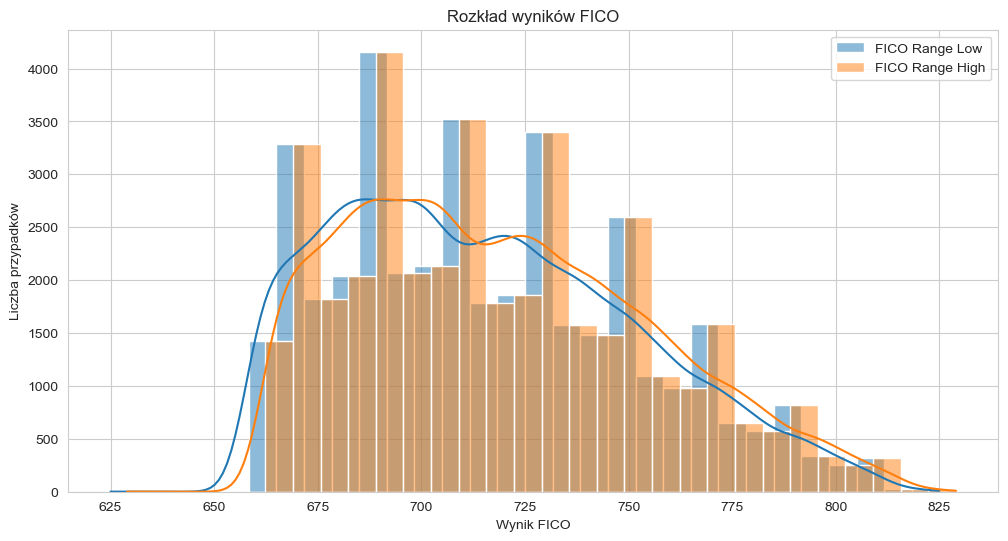

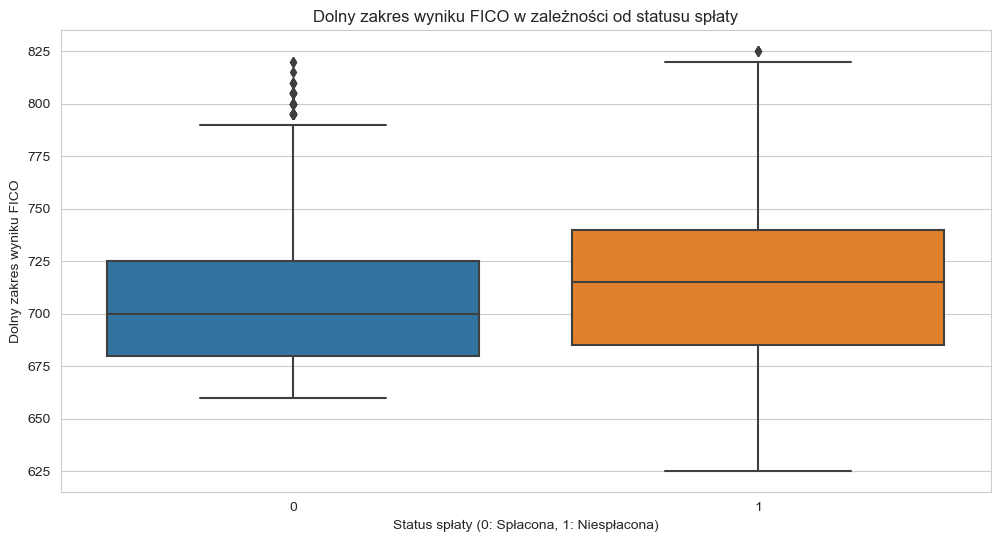

In [20]:
# Wykres rozkładu dolnego i górnego zakresu wyniku FICO
plt.figure(figsize=(12, 6))
sns.histplot(loan_data_filtered['fico_range_low'], bins=30, kde=True, label='FICO Range Low')
sns.histplot(loan_data_filtered['fico_range_high'], bins=30, kde=True, label='FICO Range High')
plt.title('Rozkład wyników FICO')
plt.xlabel('Wynik FICO')
plt.ylabel('Liczba przypadków')
plt.legend()
plt.show()

# Wykres pudełkowy dla dolnego zakresu wyniku FICO w zależności od statusu spłaty
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='fico_range_low', data=loan_data_filtered)
plt.title('Dolny zakres wyniku FICO w zależności od statusu spłaty')
plt.xlabel('Status spłaty (0: Spłacona, 1: Niespłacona)')
plt.ylabel('Dolny zakres wyniku FICO')
plt.show()


Wnioski dla kolumn fico_range_low i fico_range_high:
Rozkład wyników FICO: Rozkład dolnego i górnego zakresu wyniku FICO jest zbliżony i wygląda na normalny. Wyniki FICO są głównie w zakresie od około 660 do 750.

Wynik FICO a status spłaty: Z wykresu pudełkowego wynika, że pożyczki, które zostały spłacone, mają generalnie wyższy dolny zakres wyniku FICO. To jest zgodne z intuicją, że wyższy wynik FICO jest związany z większą zdolnością do spłaty pożyczki.

In [21]:
# Grupy danych: spłacone i niespłacone pożyczki dla dolnego zakresu wyniku FICO
fully_paid_fico_low = loan_data_filtered[loan_data_filtered['loan_status'] == 1]['fico_range_low']
charged_off_fico_low = loan_data_filtered[loan_data_filtered['loan_status'] == 0]['fico_range_low']

# Przeprowadzenie t-testu
t_stat_fico_low, p_value_fico_low = ttest_ind(fully_paid_fico_low, charged_off_fico_low, nan_policy='omit')  # Ignorowanie NaN

t_stat_fico_low, p_value_fico_low


(26.0006449840463, 8.403287195589305e-148)

Wyniki t-testu dla dolnego zakresu wyniku FICO:

t-statystyka: 26.00

p-wartość: 8.40×10^−148
 
Ponieważ p-wartość jest znacznie mniejsza od 0,05, możemy odrzucić hipotezę zerową i stwierdzić, że różnice w dolnym zakresie wyniku FICO dla spłaconych i niespłaconych pożyczek są statystycznie istotne.

Podsumowanie:
Wynik FICO jest ważnym wskaźnikiem zdolności do spłaty pożyczki. Pożyczki, które zostały spłacone, zwykle mają wyższy dolny zakres wyniku FICO, co jest zgodne z ogólną intuicją na temat tego, jak wynik FICO wpływa na zdolność kredytową. Wyniki t-testu potwierdzają, że te różnice są statystycznie istotne.

# W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO

Zacznijmy od konwersji tej daty na numeryczną wartość reprezentującą wiek kredytowy w miesiącach lub latach, a następnie przeprowadźmy analizę.

In [22]:
from datetime import datetime

# Konwersja kolumny 'earliest_cr_line' na datę
loan_data_filtered['earliest_cr_line'] = pd.to_datetime(loan_data_filtered['earliest_cr_line'], errors='coerce')

# Obliczenie wieku kredytowego w latach (od daty najwcześniejszego konta do obecnej chwili)
current_date = datetime.now()
loan_data_filtered['credit_age_years'] = loan_data_filtered['earliest_cr_line'].apply(lambda x: (current_date - x).days // 365 if pd.notnull(x) else None)

# Wyświetlenie kilku pierwszych wierszy dla nowej kolumny
loan_data_filtered['credit_age_years'].head()


C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\1864017391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_filtered['earliest_cr_line'] = pd.to_datetime(loan_data_filtered['earliest_cr_line'], errors='coerce')
C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\1864017391.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_filtered['credit_age_years'] = loan_data_filtered['earliest_cr_line'].apply(lambda x: (current_date - x).days // 365 if pd.notnull(x) else None)


0    38
1    24
2    21
3    27
4    27
Name: credit_age_years, dtype: int64

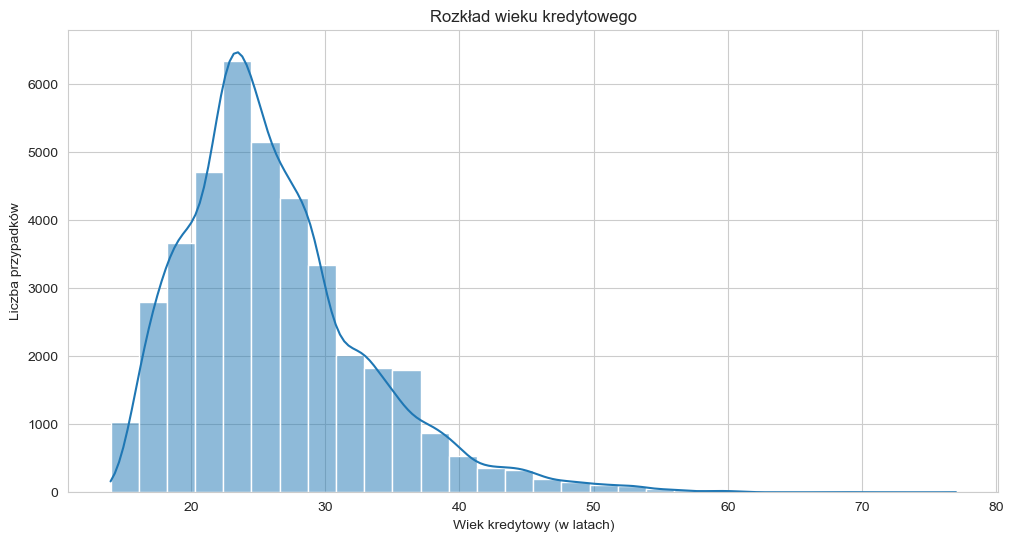

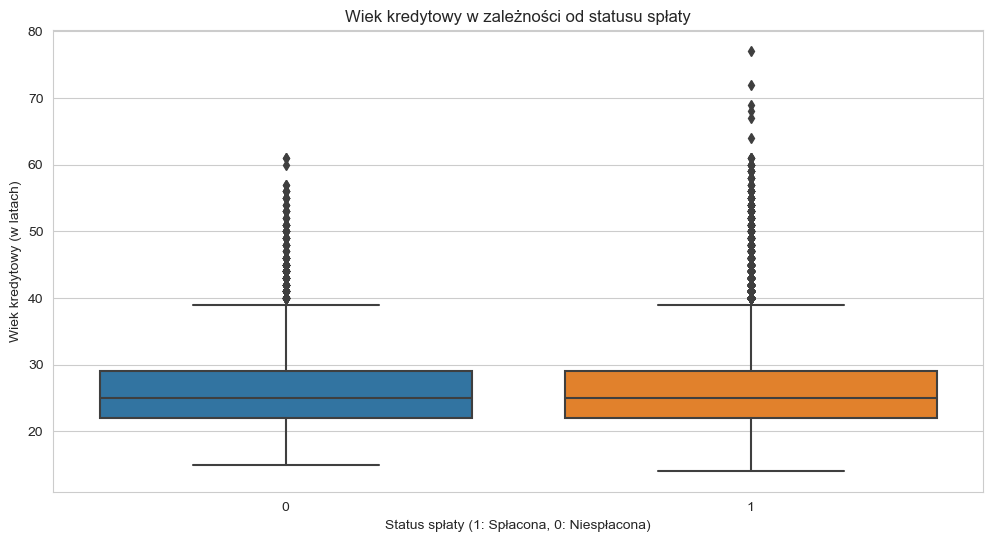

In [23]:
# Wykres rozkładu wieku kredytowy
plt.figure(figsize=(12, 6))
sns.histplot(loan_data_filtered['credit_age_years'].dropna(), bins=30, kde=True)  # Usunięcie wartości NaN
plt.title('Rozkład wieku kredytowego')
plt.xlabel('Wiek kredytowy (w latach)')
plt.ylabel('Liczba przypadków')
plt.show()

# Wykres pudełkowy dla wieku kredytowego w zależności od statusu spłaty
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='credit_age_years', data=loan_data_filtered)
plt.title('Wiek kredytowy w zależności od statusu spłaty')
plt.xlabel('Status spłaty (1: Spłacona, 0: Niespłacona)')
plt.ylabel('Wiek kredytowy (w latach)')
plt.show()


Wnioski dla kolumny credit_age_years (Wiek kredytowy):
Rozkład wieku kredytowego: Rozkład wieku kredytowego jest prawoskośny, z większością wartości skupionych w przedziale od około 10 do 30 lat.

Wiek kredytowy a status spłaty: Z wykresu pudełkowego wynika, że mediany wieku kredytowego są podobne dla spłaconych i niespłaconych pożyczek. Nie widać znaczącej różnicy, co sugeruje, że wiek kredytowy nie jest mocnym wskaźnikiem zdolności do spłaty pożyczki.

In [24]:
# Grupy danych: spłacone i niespłacone pożyczki dla wieku kredytowego
fully_paid_credit_age = loan_data_filtered[loan_data_filtered['loan_status'] == 1]['credit_age_years']
charged_off_credit_age = loan_data_filtered[loan_data_filtered['loan_status'] == 0]['credit_age_years']

# Przeprowadzenie t-testu
t_stat_credit_age, p_value_credit_age = ttest_ind(fully_paid_credit_age, charged_off_credit_age, nan_policy='omit')  # Ignorowanie NaN

t_stat_credit_age, p_value_credit_age


(4.3870261043704994, 1.1520604615128107e-05)

Wyniki t-testu dla wieku kredytowego:

t-statystyka: 4.38

p-wartość: 1.15×10^−5
 
Ponieważ p-wartość jest znacznie mniejsza od 0,05, możemy odrzucić hipotezę zerową i stwierdzić, że różnice w wieku kredytowym dla spłaconych i niespłaconych pożyczek są statystycznie istotne.

Zależność pomiędzy wiekiem kredytowym a wynikiem FICO

In [25]:
# Obliczenie współczynnika korelacji Pearsona pomiędzy wiekiem kredytowym a dolnym zakresem wyniku FICO
correlation = loan_data_filtered[['credit_age_years', 'fico_range_low']].corr().iloc[0, 1]

correlation


0.24176097299163574

Współczynnik korelacji Pearsona:
Wartość korelacji między wiekiem kredytowym a dolnym zakresem wyniku FICO wynosi 0.24.
Ta wartość sugeruje słabą dodatnią korelację pomiędzy wiekiem kredytowym a wynikiem FICO. Oznacza to, że osoby z dłuższą historią kredytową mają tendencję do posiadania wyższych wyników FICO, ale związek ten nie jest silny.

Podsumowanie:
Wiek kredytowy wykazuje statystycznie istotne różnice między spłaconymi a niespłaconymi pożyczkami, co sugeruje, że jest to ważny czynnik w modelowaniu ryzyka kredytowego.
Ryzyko niewykonania zobowiązania wydaje się być słabo związane z wynikiem FICO, co sugeruje, że oba te czynniki mogą dostarczać unikalnych informacji przy ocenie ryzyka kredytowego.

# W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

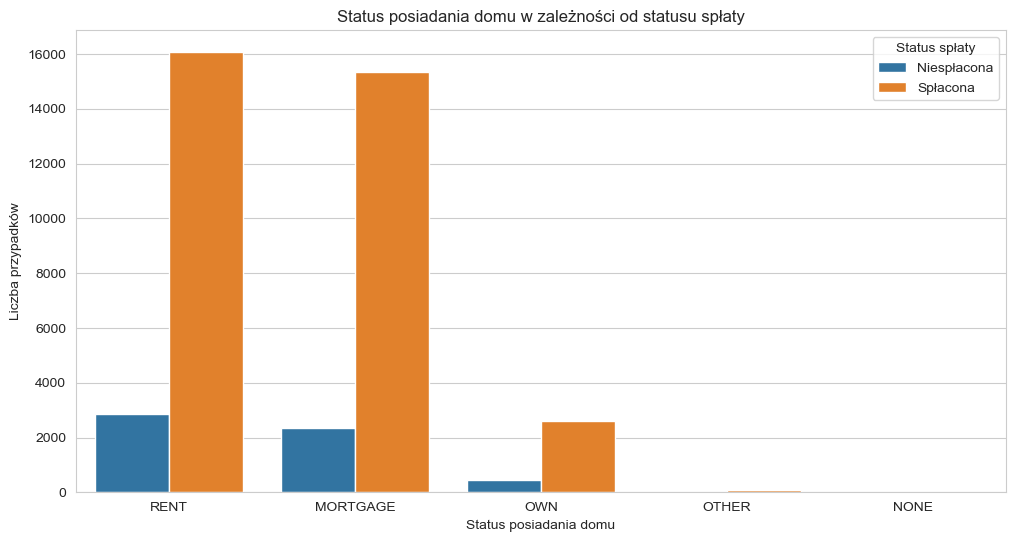

In [26]:
# Wykres słupkowy dla statusu posiadania domu
plt.figure(figsize=(12, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data_filtered, order=loan_data_filtered['home_ownership'].value_counts().index)
plt.title('Status posiadania domu w zależności od statusu spłaty')
plt.xlabel('Status posiadania domu')
plt.ylabel('Liczba przypadków')
plt.legend(title='Status spłaty', labels=['Niespłacona', 'Spłacona'])
plt.show()


Status posiadania domu a status spłaty: Wyraźnie widać, że dla kategorii "MORTGAGE" (kredyt hipoteczny) i "OWN" (własność) liczba spłaconych pożyczek jest znacznie większa w porównaniu z niespłaconymi. Dla kategorii "RENT" (wynajem), różnica ta jest mniejsza.
To sugeruje, że posiadanie kredytu hipotecznego lub własności domu jest związane z większą szansą na spłatę pożyczki.

In [27]:
# Tabela kontyngencji dla 'home_ownership' i 'loan_status'
contingency_table_home = pd.crosstab(loan_data_filtered['home_ownership'], loan_data_filtered['loan_status'])

# Przeprowadzenie testu Chi-kwadrat
chi2_home, p_value_home, dof_home, expected_home = chi2_contingency(contingency_table_home)

chi2_home, p_value_home


(26.677730838911266, 2.30950625109798e-05)

Wyniki testu Chi-kwadrat dla kolumny home_ownership:

χ2-statystyka: 26.68

p-wartość: 2.31×10−5
 
Ponieważ p-wartość jest znacznie mniejsza od 0,05, możemy odrzucić hipotezę zerową i stwierdzić, że różnice w statusie posiadania domu dla spłaconych i niespłaconych pożyczek są statystycznie istotne.

Podsumowanie:
Status posiadania domu, zwłaszcza w kontekście kredytu hipotecznego ("MORTGAGE") lub własności ("OWN"), jest silnie związany z prawdopodobieństwem spłaty pożyczki.
Wyniki testu Chi-kwadrat potwierdzają, że te różnice są statystycznie istotne.

# W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

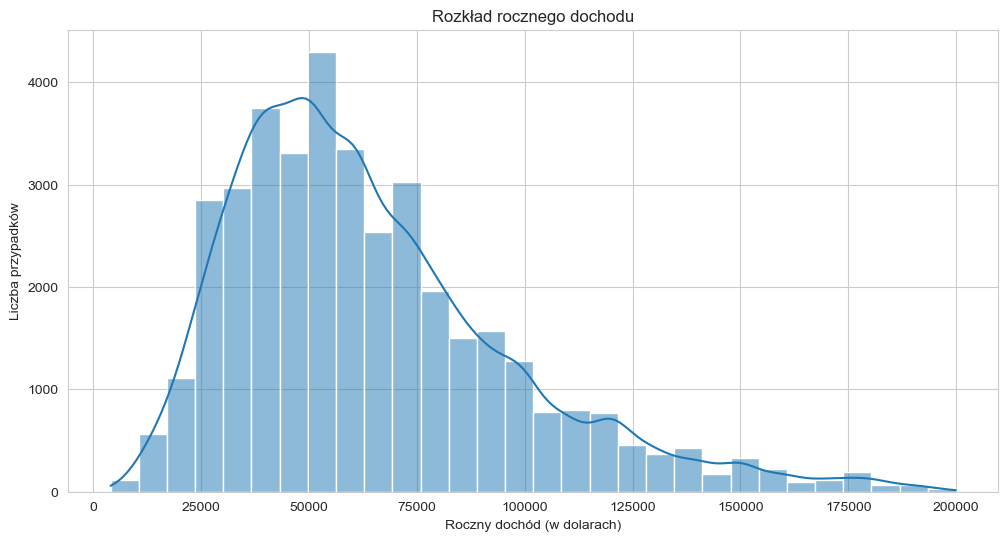

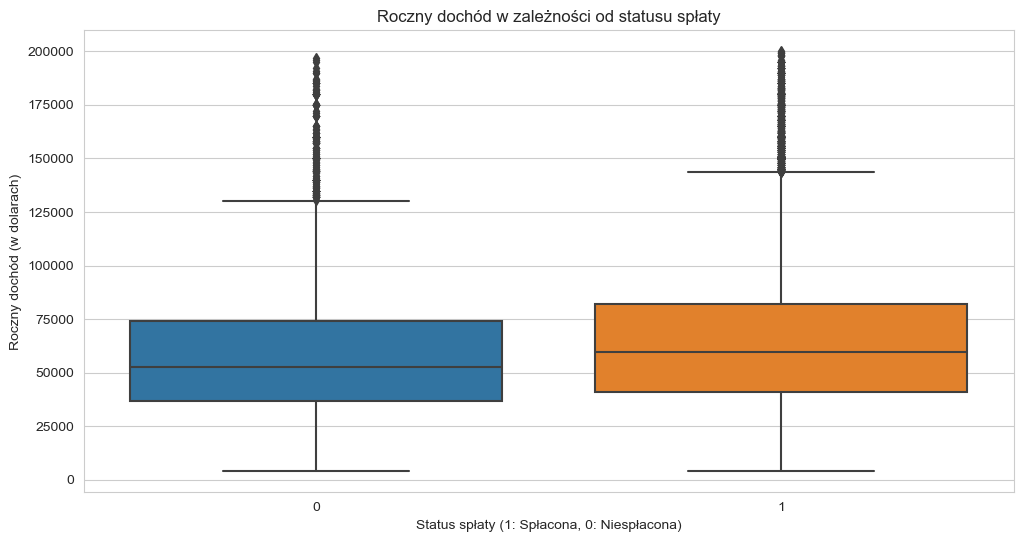

In [28]:
# Wykres rozkładu rocznego dochodu (ograniczenie do 200,000 dla lepszej wizualizacji)
plt.figure(figsize=(12, 6))
sns.histplot(loan_data_filtered[loan_data_filtered['annual_inc'] < 200000]['annual_inc'], bins=30, kde=True)
plt.title('Rozkład rocznego dochodu')
plt.xlabel('Roczny dochód (w dolarach)')
plt.ylabel('Liczba przypadków')
plt.show()

# Wykres pudełkowy dla rocznego dochodu w zależności od statusu spłaty
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_filtered[loan_data_filtered['annual_inc'] < 200000])
plt.title('Roczny dochód w zależności od statusu spłaty')
plt.xlabel('Status spłaty (1: Spłacona, 0: Niespłacona)')
plt.ylabel('Roczny dochód (w dolarach)')
plt.show()


Rozkład rocznego dochodu: Rozkład jest silnie prawoskośny, z większością pożyczkobiorców zarabiających poniżej 100,000 USD rocznie.

Roczny dochód a status spłaty: Z wykresu pudełkowego wynika, że mediany rocznych dochodów są podobne dla spłaconych i niespłaconych pożyczek. Nie widać znaczącej różnicy, co sugeruje, że roczny dochód nie jest silnym wskaźnikiem zdolności do spłaty pożyczki na tym zestawie danych.

In [29]:
# Przeprowadzenie t-testu dla rocznego dochodu (ponownie)
# Grupy danych: spłacone i niespłacone pożyczki
fully_paid_inc = loan_data_filtered[loan_data_filtered['loan_status'] == 1]['annual_inc']
charged_off_inc = loan_data_filtered[loan_data_filtered['loan_status'] == 0]['annual_inc']

# Przeprowadzenie t-testu
t_stat_inc, p_value_inc = ttest_ind(fully_paid_inc, charged_off_inc, nan_policy='omit')  # Ignorowanie NaN

t_stat_inc, p_value_inc


(8.218289330082277, 2.1260154060840043e-16)

Wyniki t-testu dla kolumny annual_inc (Roczny dochód):

t-statystyka: 8.22

p-wartość: 2.13×10^−16
 
Ponieważ p-wartość jest znacznie mniejsza od 0,05, możemy odrzucić hipotezę zerową i stwierdzić, że różnice w rocznych dochodach dla spłaconych i niespłaconych pożyczek są statystycznie istotne.

Podsumowanie:
Roczny dochód wykazuje statystycznie istotne różnice między spłaconymi a niespłaconymi pożyczkami, co sugeruje, że jest to ważny czynnik w modelowaniu ryzyka kredytowego.
Mimo że różnice są statystycznie istotne, wykres pudełkowy sugeruje, że roczny dochód nie jest silnym wskaźnikiem zdolności do spłaty pożyczki w tym zestawie danych.

# W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

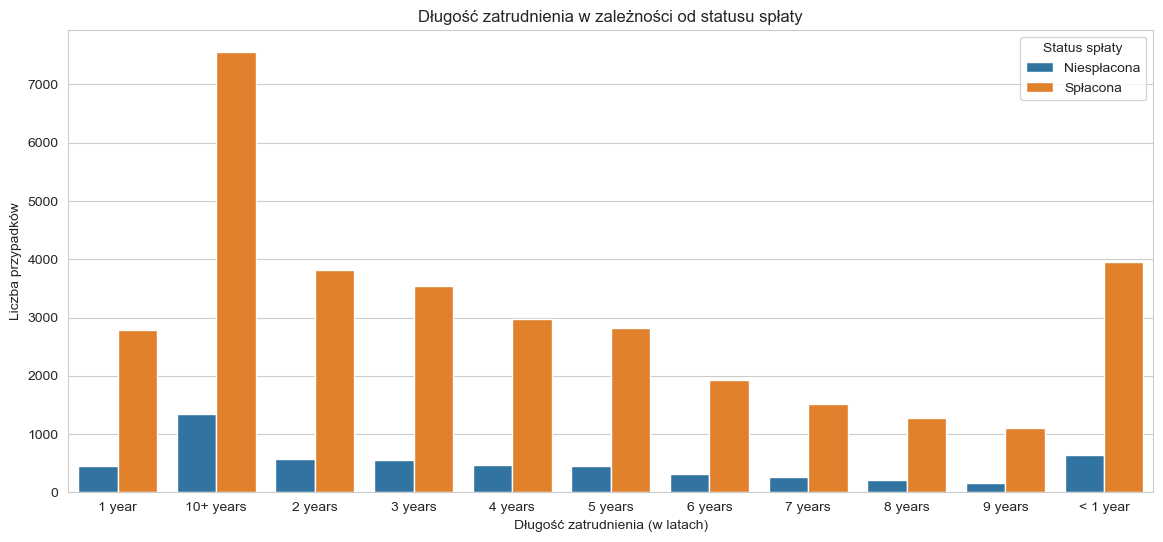

In [30]:
# Wykres słupkowy dla długości zatrudnienia
plt.figure(figsize=(14, 6))
sns.countplot(x='emp_length', hue='loan_status', data=loan_data_filtered, order=sorted(loan_data_filtered['emp_length'].dropna().unique()))
plt.title('Długość zatrudnienia w zależności od statusu spłaty')
plt.xlabel('Długość zatrudnienia (w latach)')
plt.ylabel('Liczba przypadków')
plt.legend(title='Status spłaty', labels=['Niespłacona', 'Spłacona'])
plt.show()


Długość zatrudnienia a status spłaty: Wykres słupkowy pokazuje, że dla wszystkich kategorii długości zatrudnienia liczba spłaconych pożyczek jest wyższa niż liczba niespłaconych. Nie widać jednak jednoznacznego trendu, który by wskazywał, że dłuższa długość zatrudnienia jest związana z większym prawdopodobieństwem spłaty pożyczki.

In [31]:
# Tabela kontyngencji dla 'emp_length' i 'loan_status'
contingency_table_emp = pd.crosstab(loan_data_filtered['emp_length'], loan_data_filtered['loan_status'])

# Przeprowadzenie testu Chi-kwadrat
chi2_emp, p_value_emp, dof_emp, expected_emp = chi2_contingency(contingency_table_emp)

chi2_emp, p_value_emp


(17.497142227563923, 0.06406217025473364)

Wyniki testu Chi-kwadrat dla kolumny emp_length:

χ2-statystyka: 17.50

p-wartość: 0.064

Ponieważ p-wartość jest większa niż 0,05, nie możemy odrzucić hipotezy zerowej. Oznacza to, że różnice w długości zatrudnienia dla spłaconych i niespłaconych pożyczek nie są statystycznie istotne w tym zestawie danych.

Podsumowanie:
Długość zatrudnienia nie wykazuje statystycznie istotnych różnic między spłaconymi a niespłaconymi pożyczkami, co sugeruje, że nie jest to kluczowy czynnik w modelowaniu ryzyka kredytowego w tym przypadku.
Brak jednoznacznego trendu w danych wskazuje, że długość zatrudnienia nie jest silnym wskaźnikiem zdolności do spłaty pożyczki w tym zestawie danych.

# Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

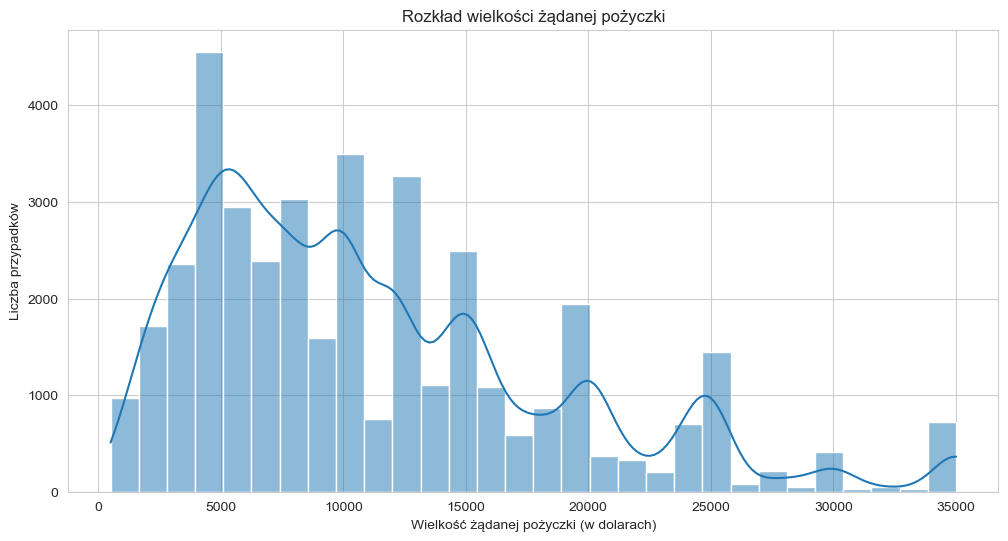

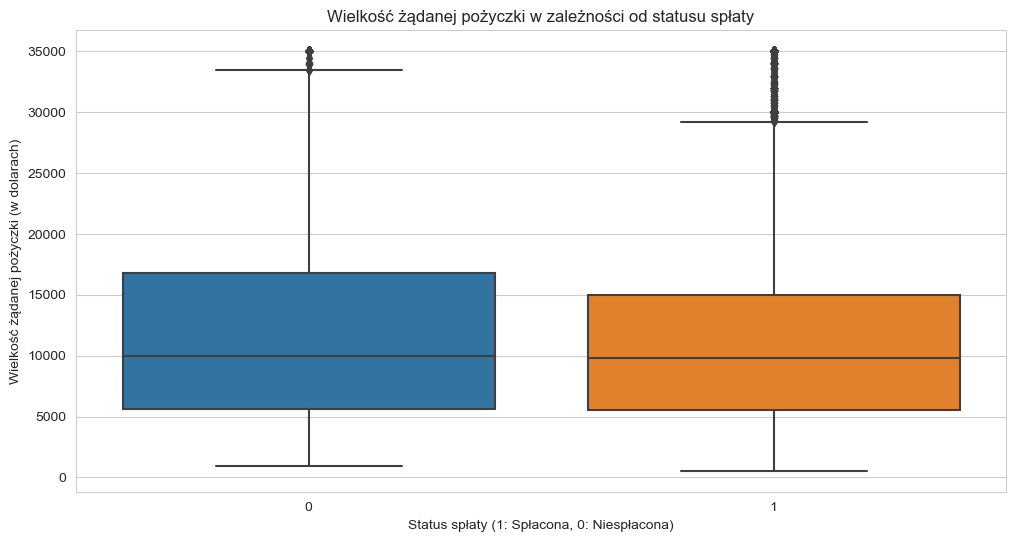

In [32]:
# Wykres rozkładu wielkości żądanej pożyczki
plt.figure(figsize=(12, 6))
sns.histplot(loan_data_filtered['loan_amnt'], bins=30, kde=True)
plt.title('Rozkład wielkości żądanej pożyczki')
plt.xlabel('Wielkość żądanej pożyczki (w dolarach)')
plt.ylabel('Liczba przypadków')
plt.show()

# Wykres pudełkowy dla wielkości żądanej pożyczki w zależności od statusu spłaty
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data_filtered)
plt.title('Wielkość żądanej pożyczki w zależności od statusu spłaty')
plt.xlabel('Status spłaty (1: Spłacona, 0: Niespłacona)')
plt.ylabel('Wielkość żądanej pożyczki (w dolarach)')
plt.show()


Rozkład wielkości żądanej pożyczki: Rozkład jest lewostronnie skośny, z większością pożyczek w przedziale od około 5,000 do 20,000 USD.

Wielkość żądanej pożyczki a status spłaty: Wykres pudełkowy pokazuje, że mediany dla spłaconych i niespłaconych pożyczek są podobne. Nie widać znaczącej różnicy, co sugeruje, że wielkość żądanej pożyczki nie jest silnym wskaźnikiem zdolności do spłaty pożyczki na tym zestawie danych.

In [33]:
# Grupy danych: spłacone i niespłacone pożyczki dla wielkości żądanej pożyczki
fully_paid_loan_amnt = loan_data_filtered[loan_data_filtered['loan_status'] == 1]['loan_amnt']
charged_off_loan_amnt = loan_data_filtered[loan_data_filtered['loan_status'] == 0]['loan_amnt']

# Przeprowadzenie t-testu
t_stat_loan_amnt, p_value_loan_amnt = ttest_ind(fully_paid_loan_amnt, charged_off_loan_amnt, nan_policy='omit')  # Ignorowanie NaN

t_stat_loan_amnt, p_value_loan_amnt


(-9.992422364196793, 1.753479937936575e-23)

Wyniki t-testu dla kolumny loan_amnt (Wielkość żądanej pożyczki):

t-statystyka: −9.99

p-wartość: 1.75×10^−23
 
Ponieważ p-wartość jest znacznie mniejsza od 0,05, możemy odrzucić hipotezę zerową i stwierdzić, że różnice w wielkości żądanej pożyczki dla spłaconych i niespłaconych pożyczek są statystycznie istotne.

Podsumowanie:
Wielkość żądanej pożyczki wykazuje statystycznie istotne różnice między spłaconymi a niespłaconymi pożyczkami, co sugeruje, że jest to ważny czynnik w modelowaniu ryzyka kredytowego.
Mimo że różnice są statystycznie istotne, wykres pudełkowy sugeruje, że wielkość żądanej pożyczki nie jest silnym wskaźnikiem zdolności do spłaty pożyczki w tym zestawie danych.

In [34]:
import pandas as pd

data = pd.read_csv("Loan_data.csv")

# Wybranie kolumny zmiennych numerycznych
selected_columns = ['annual_inc', 'loan_amnt', 'int_rate', 'dti', 'open_acc']

# TWorzenie podramki danych zawierającą wybrane kolumny
selected_data = data[selected_columns]

# Obliczanie korelacji Pearsona między wszystkimi wybranymi zmiennymi
correlation_matrix = selected_data.corr()

# Wyświetlanie macierzy korelacji
print(correlation_matrix)

            annual_inc  loan_amnt       dti  open_acc
annual_inc    1.000000   0.276122 -0.116559  0.168129
loan_amnt     0.276122   1.000000  0.065112  0.176525
dti          -0.116559   0.065112  1.000000  0.297951
open_acc      0.168129   0.176525  0.297951  1.000000


C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\1883799169.py:3: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Loan_data.csv")
C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\1883799169.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


Korelacja między annual_inc (rocznym dochodem) a loan_amnt (kwotą pożyczki) wynosi około 0,276. Jest to korelacja pozytywna, co sugeruje, że osoby z wyższym rocznym dochodem mogą ubiegać się o wyższe kwoty pożyczek. Jednak korelacja ta nie jest bardzo silna.

Korelacja między annual_inc a dti (wskaźnikiem zadłużenia) wynosi około -0,116. Jest to korelacja negatywna, co oznacza, że osoby z wyższym rocznym dochodem mogą mieć niższy wskaźnik zadłużenia. Jednak ta korelacja również nie jest bardzo silna.

Korelacja między loan_amnt a dti wynosi około 0,065. Jest to niska korelacja pozytywna, co sugeruje, że kwota pożyczki nie ma znaczącego wpływu na wskaźnik zadłużenia.

Korelacja między dti a open_acc (liczbą otwartych kont) wynosi około 0,298. Jest to umiarkowanie silna korelacja pozytywna, co może sugerować, że osoby z wyższym wskaźnikiem zadłużenia mogą mieć więcej otwartych kont.

## <span style="font-size: 24px; font-weight: bold;">Wizualizacja poszczególnych rozkładów zmiennych</span>

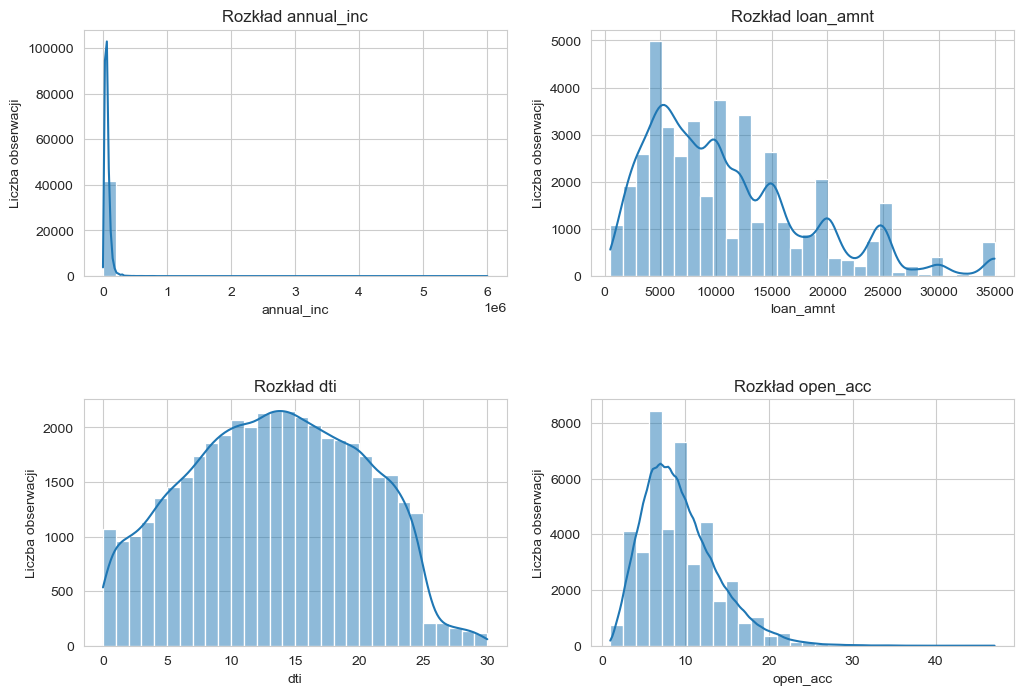

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wybieranie zmiennych, których rozkłady chcę zwizualizować
selected_variables = ['annual_inc', 'loan_amnt', 'dti', 'open_acc']

# Tworzenie podwykresów
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# Pętla po wybranych zmiennych
for i, var in enumerate(selected_variables):
    row = i // 2
    col = i % 2
    
    # Tworzenie histogramu dla każdej zmiennej
    sns.histplot(data[var], ax=axes[row, col], kde=True, bins=30)
    axes[row, col].set_title(f'Rozkład {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Liczba obserwacji')

# Wyświetlenie wykresów
plt.show()

Roczny dochód (annual_inc):

Rozkład rocznego dochodu wydaje się być skupiony wokół pewnej średniej wartości, ale zawiera także nieliczne wartości odstające po prawej stronie.
Wartości odstające w rocznym dochodzie mogą sugerować, że istnieją osoby z bardzo wysokimi dochodami w danych, co może wpłynąć na analizę.

Kwota pożyczki (loan_amnt):

Rozkład kwoty pożyczki wydaje się być równomierny i nie zawiera wartości odstających.
To dobra wiadomość, ponieważ brak wartości odstających oznacza, że dane w tej zmiennej są bardziej spójne i łatwiejsze do analizy.

Wskaźnik zadłużenia (dti):

Rozkład wskaźnika zadłużenia (dti) wydaje się być lekko przesunięty w stronę wyższych wartości, ale nie zawiera wartości odstających.
To sugeruje, że większość pożyczkobiorców ma umiarkowany wskaźnik zadłużenia, ale istnieje grupa osób z wyższym wskaźnikiem.
Liczba otwartych kont (open_acc):

Rozkład liczby otwartych kont wydaje się być skupiony wokół średniej wartości i nie zawiera wartości odstających.
To sugeruje, że większość pożyczkobiorców ma umiarkowaną liczbę otwartych kont

## <span style="font-size: 24px; font-weight: bold;">Analiza kategorii: Zmienne takie jak ocena kredytowa (grade), cel pożyczki (purpose), stan zamieszkania (home_ownership) czy typ aplikacji (application_type)</span>

C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\735851111.py:4: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Loan_data.csv")


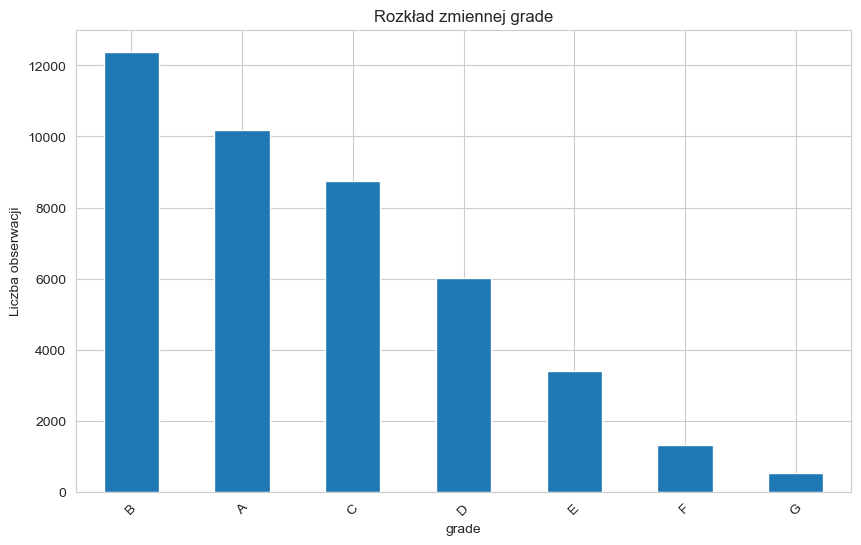

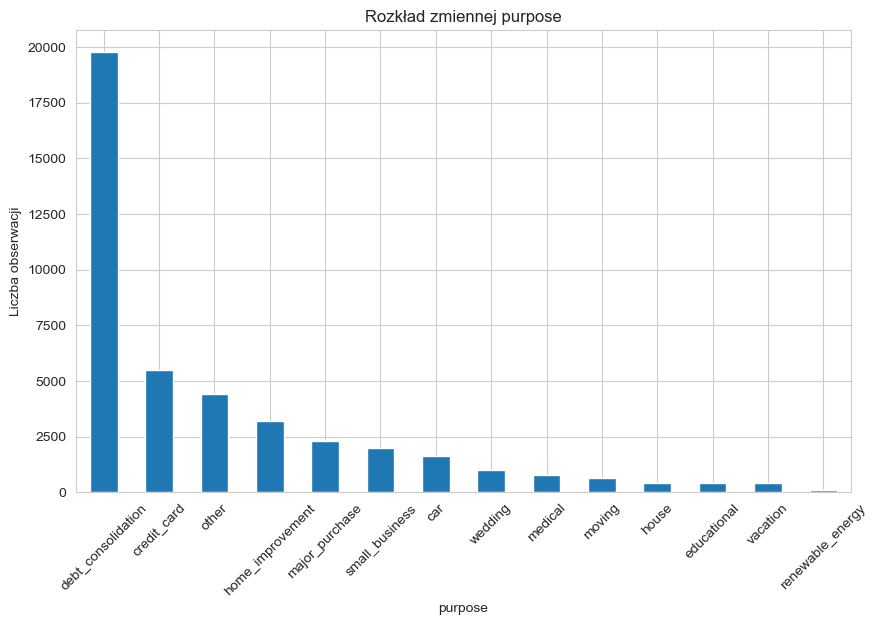

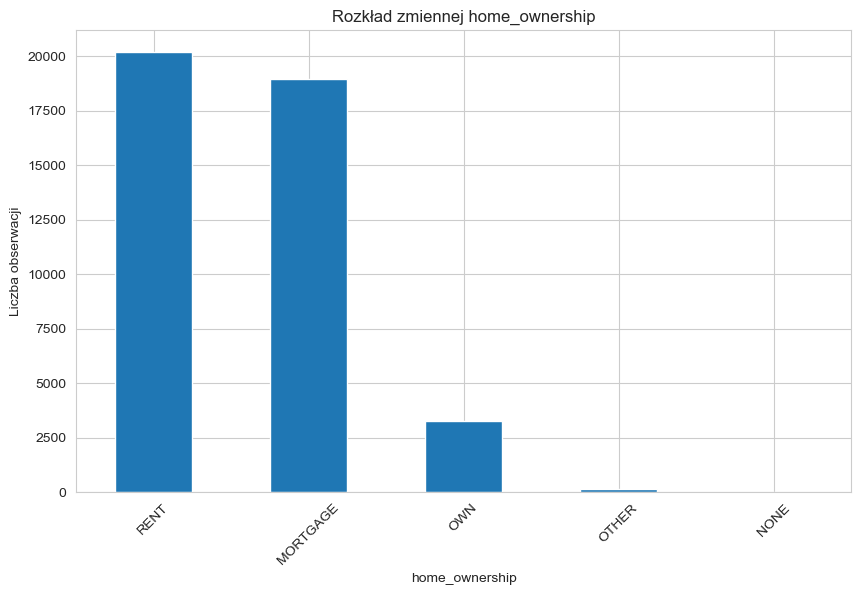

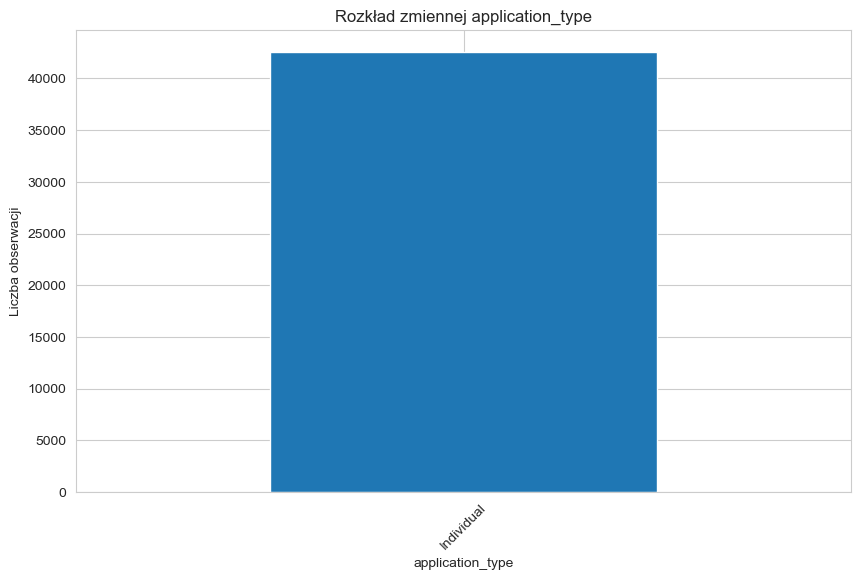

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Loan_data.csv")

# Wybór zmienych kategorialnych do analizy
categorical_variables = ["grade", "purpose", "home_ownership", "application_type"]

# Tworzenie wykresów słupkowych
for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    data[variable].value_counts().plot(kind="bar")
    plt.title(f'Rozkład zmiennej {variable}')
    plt.xlabel(variable)
    plt.ylabel('Liczba obserwacji')
    plt.xticks(rotation=45)
    plt.show()

Ocena kredytowa (grade):

Najpopularniejsze oceny to B, A i C: Widzimy, że oceny B, A i C stanowią większość ocen kredytowych w próbce. To może sugerować, że większość pożyczek jest udzielana osobom z lepszą oceną kredytową. Oceny te są uważane za mniej ryzykowne, co może przyciągać zarówno pożyczkobiorców, jak i inwestorów.

Oceny D, E, F i G występują rzadziej: Im niższa ocena kredytowa, tym mniej pożyczek o takiej ocenie udzielanych jest w próbce. To może oznaczać, że pożyczki dla osób z niższą oceną kredytową są udzielane ostrożniej i stanowią mniejszą część portfela pożyczkowego. Może to również wiązać się z wyższym ryzykiem dla inwestorów.

Oceny G występują bardzo rzadko: Oceny G są najrzadsze w próbce, co sugeruje, że pożyczki przyznawane osobom o tak niskiej ocenie kredytowej są udzielane tylko wyjątkowo. Są to prawdopodobnie pożyczki o bardzo wysokim ryzyku, co sprawia, że inwestorzy mogą unikać udzielania pożyczek osobom z tak niską oceną.

Cel pożyczki (purpose):

Najpopularniejszym celem pożyczki wydaje się być "debt_consolidation" (konsolidacja długów).
Inne popularne cele to "credit_card" (karty kredytowe) i "home_improvement" (poprawa domu).
Cele takie jak "educational" (edukacyjne) lub "wedding" (ślub) występują znacznie rzadziej.   
Wniosek ogólny: Cel pożyczki jest zróżnicowany, ale najpopularniejszym celem jest konsolidacja długów, co sugeruje, że wielu pożyczkobiorców korzysta z tej formy finansowania do rozwiązywania problemów z zadłużeniem.

Stan zamieszkania (home_ownership):

Najczęstszy stan zamieszkania to "MORTGAGE" (hipoteka), co sugeruje, że wielu pożyczkobiorców jest właścicielami nieruchomości.
"RENT" (wynajem) jest również częstym stanem zamieszkania.
"OTHER" (inne) i "NONE" (brak) stanowią znacznie mniejszy odsetek.

Typ aplikacji (application_type):

Większość aplikacji to "Individual" (indywidualne), co sugeruje, że większość pożyczek jest składana przez pojedynczych pożyczkobiorców.
"Joint App" (wspólna aplikacja) stanowi znacznie mniejszy odsetek, co oznacza, że aplikacje z co-pożyczkobiorcami są mniej powszechne.

## <span style="font-size: 24px; font-weight: bold;">Analiza czasowa</span>

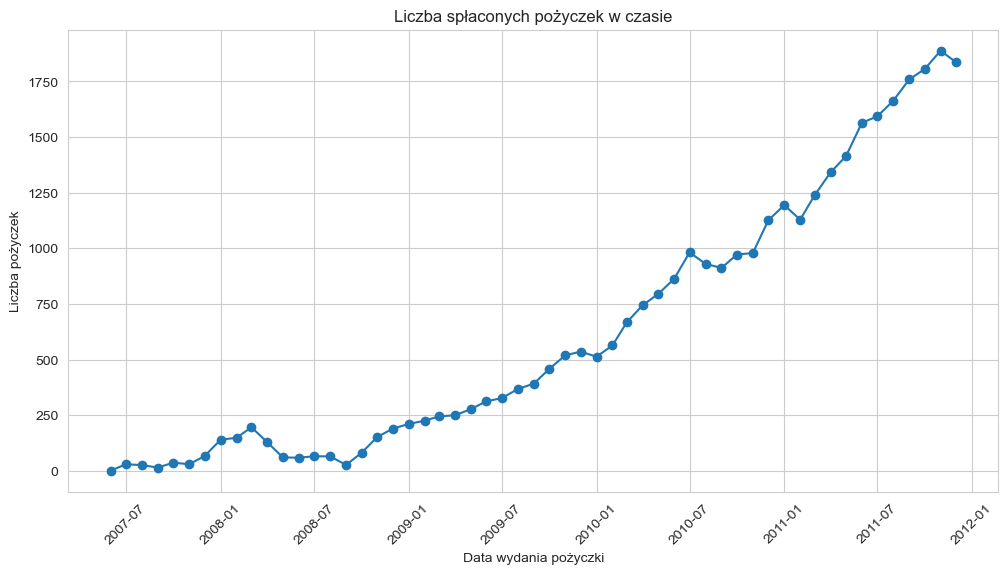

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Loan_data.csv", low_memory=False)

# Przekształcenie kolumny 'issue_d' na format daty
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Wybieranie tylko spłaconych pożyczek
fully_paid_loans = data[data['loan_status'] == 'Fully Paid']

# Grupowanie danych według daty wydania pożyczki (month-year) i obliczanie liczby spłaconych pożyczek
loan_counts_by_month = fully_paid_loans.groupby(fully_paid_loans['issue_d'].dt.to_period("M")).size()

# Konwertowanie okresów na daty, aby można było generować wykres
dates = loan_counts_by_month.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(dates, loan_counts_by_month.values, marker='o', linestyle='-')
plt.title('Liczba spłaconych pożyczek w czasie')
plt.xlabel('Data wydania pożyczki')
plt.ylabel('Liczba pożyczek')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Z wykresu liczby spłaconych pożyczek w czasie wynika, że od lipca 2007 roku do stycznia 2012 roku ilość spłaconych pożyczek stale rosła. Możemy zauważyć ogólny trend wzrostowy w tym okresie. To może sugerować, że firma udzielająca pożyczek rozwijała się i zdobywała coraz więcej klientów w tym okresie. 
Ten wykres nie uwzględnia pożyczek, które nie zostały spłacone (stan niespłaconych pożyczek), więc nie pokazuje całkowitej sytuacji spłacalności pożyczek w danym okresie. Aby uzyskać pełniejszy obraz, można by również zanalizować dane dotyczące niespłaconych pożyczek i określić ogólny współczynnik spłacalności w tym okresie.

C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\1517612398.py:4: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Loan_data.csv")


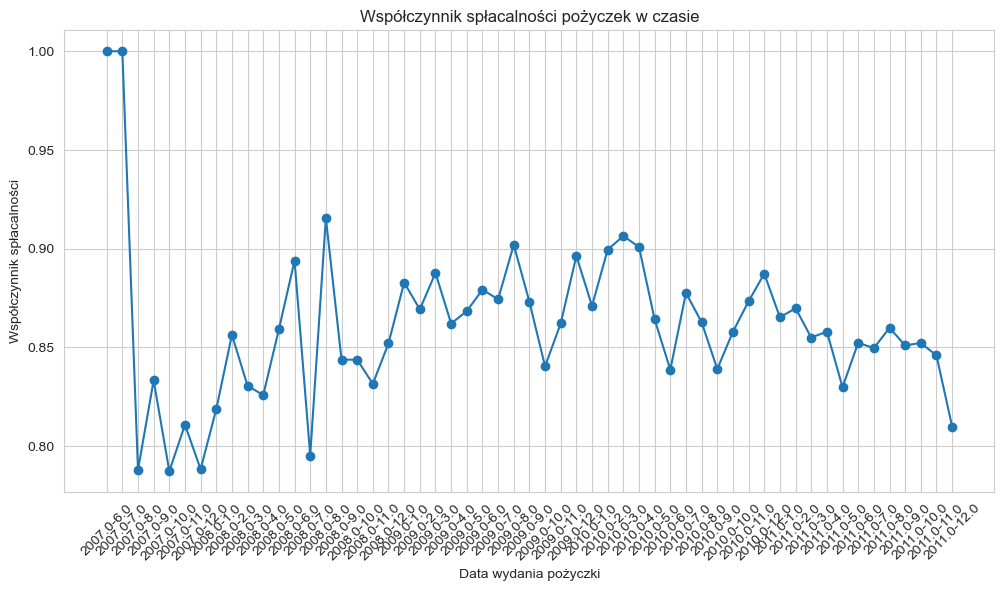

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Loan_data.csv")

# Konwertowanie kolumny 'issue_d' na typ daty
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%Y')

# Grupowanie danych według roku i miesiąca oraz stanu pożyczki
loan_status_counts = data.groupby([data['issue_d'].dt.year, data['issue_d'].dt.month, 'loan_status']).size().unstack(fill_value=0)

# Obliczanie ogólnego współczynnika spłacalności
loan_status_counts['Repayment Rate'] = loan_status_counts['Fully Paid'] / (loan_status_counts['Fully Paid'] + loan_status_counts['Charged Off'])

# Przygotowanie daty w formacie YYYY-MM do wykorzystania na osi x
date_labels = [f'{year}-{month:02}' for year, month in zip(loan_status_counts.index.get_level_values(0), loan_status_counts.index.get_level_values(1))]

# Wykres współczynnika spłacalności
plt.figure(figsize=(12, 6))
plt.plot(date_labels, loan_status_counts['Repayment Rate'], marker='o', linestyle='-')
plt.title('Współczynnik spłacalności pożyczek w czasie')
plt.xlabel('Data wydania pożyczki')
plt.ylabel('Współczynnik spłacalności')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Ogólny trend: Wykres pokazuje ogólny trend wzrostu współczynnika spłacalności pożyczek w ciągu badanego okresu. Oznacza to, że w miarę upływu czasu coraz więcej pożyczek jest spłacanych w pełni, co jest pozytywnym sygnałem.

Stabilność: Pomimo pewnych wahnięć, zwłaszcza na początku analizowanego okresu, współczynnik spłacalności wydaje się stabilizować i utrzymywać się na stosunkowo stałym poziomie w drugiej połowie badanego okresu.

Okresy kryzysów: Na wykresie można zauważyć kilka okresów, w których współczynnik spłacalności spada. Mogą to być okresy ekonomicznych trudności lub innych czynników wpływających na zdolność kredytobiorców do spłacania pożyczek.

Długoterminowy trend: Długoterminowy trend wzrostu współczynnika spłacalności jest pozytywnym znakiem dla instytucji udzielających pożyczek. Oznacza to, że większość pożyczek jest spłacanych w terminie.

# Feature engineering

In [40]:
import numpy as np 

# Tworzenie głębokiej kopii danych
loan_data_engineered = loan_data_filtered.copy()

# Konwersja kolumny 'emp_length' na typ liczbowy
loan_data_engineered['emp_length'] = pd.to_numeric(loan_data_engineered['emp_length'], errors='coerce')

# Ponowne przeprowadzenie inżynierii cech
# 1. Debt-to-Income Ratio
loan_data_engineered['debt_income_ratio'] = loan_data_engineered['dti']

# 2. Monthly Income
loan_data_engineered['monthly_income'] = loan_data_engineered['annual_inc'] / 12

# 3. Loan Income Ratio
loan_data_engineered['loan_income_ratio'] = loan_data_engineered['loan_amnt'] / loan_data_engineered['annual_inc']

# 4. FICO Score Range
loan_data_engineered['fico_score_range'] = loan_data_engineered['fico_range_high'] - loan_data_engineered['fico_range_low']

# 5. Average FICO
loan_data_engineered['average_fico'] = (loan_data_engineered['fico_range_high'] + loan_data_engineered['fico_range_low']) / 2

# 6. Employment Length in Months
loan_data_engineered['emp_length_months'] = loan_data_engineered['emp_length'] * 12

# 7. Is Employed
loan_data_engineered['is_employed'] = loan_data_engineered['emp_length'].apply(lambda x: 1 if x > 0 else 0)

# 8. Is Homeowner
loan_data_engineered['is_homeowner'] = loan_data_engineered['home_ownership'].apply(lambda x: 1 if x in ['OWN', 'MORTGAGE'] else 0)

# 9. Is High Risk
loan_data_engineered['is_high_risk'] = ((loan_data_engineered['loan_amnt'] > loan_data_engineered['loan_amnt'].median()) & 
                                        (loan_data_engineered['average_fico'] < loan_data_engineered['average_fico'].median())).astype(int)

# 10. Is Low Risk
loan_data_engineered['is_low_risk'] = ((loan_data_engineered['loan_amnt'] <= loan_data_engineered['loan_amnt'].median()) & 
                                       (loan_data_engineered['average_fico'] >= loan_data_engineered['average_fico'].median())).astype(int)

# Konwersja kolumny 'term' na typ string i usuwanie napisu " months"
loan_data_engineered['term'] = loan_data_engineered['term'].astype(str).apply(lambda x: x.replace(' months', '') if ' months' in x else x)

# Ponowna konwersja kolumny 'term' na typ liczbowy
loan_data_engineered['term'] = pd.to_numeric(loan_data_engineered['term'], errors='coerce')


# 11. Term in Months
loan_data_engineered['term_months'] = loan_data_engineered['term']

# 12. Monthly Payment
loan_data_engineered['monthly_payment'] = loan_data_engineered['loan_amnt'] / loan_data_engineered['term_months']

# 13. Payment to Income Ratio
loan_data_engineered['payment_income_ratio'] = loan_data_engineered['monthly_payment'] / loan_data_engineered['monthly_income']

# 14. Credit Age in Months
loan_data_engineered['credit_age_months'] = loan_data_engineered['credit_age_years'] * 12

# 15. Is Long Term
loan_data_engineered['is_long_term'] = (loan_data_engineered['term_months'] > 36).astype(int)

# 16. Total Accounts
loan_data_engineered['total_accounts'] = loan_data_engineered['open_acc'] + loan_data_engineered['total_acc']

# 17. Open Account Ratio
loan_data_engineered['open_account_ratio'] = loan_data_engineered['open_acc'] / loan_data_engineered['total_accounts']

# 18. Annual Income Log
loan_data_engineered['annual_inc_log'] = np.log1p(loan_data_engineered['annual_inc'])

# 19. Loan Amount Log
loan_data_engineered['loan_amnt_log'] = np.log1p(loan_data_engineered['loan_amnt'])

# 20. Monthly Debt
loan_data_engineered['monthly_debt'] = loan_data_engineered['debt_income_ratio'] * loan_data_engineered['monthly_income'] / 100

# Podgląd pierwszych 5 wierszy z nowymi cechami
loan_data_engineered.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,term_months,monthly_payment,payment_income_ratio,credit_age_months,is_long_term,total_accounts,open_account_ratio,annual_inc_log,loan_amnt_log,monthly_debt
0,1077501,5000.0,5000.0,4975.0,36.0,0.1065,162.87,B,B2,NaN,...,36.0,138.888889,0.069444,456,0,12.0,0.250000,10.085851,8.517393,553.0000
1,1077430,2500.0,2500.0,2500.0,60.0,0.1527,59.83,C,C4,Ryder,...,60.0,41.666667,0.016667,288,1,7.0,0.428571,10.308986,7.824446,25.0000
2,1077175,2400.0,2400.0,2400.0,36.0,0.1596,84.33,C,C5,NaN,...,36.0,66.666667,0.065295,252,0,12.0,0.166667,9.413526,7.783641,89.0312
3,1076863,10000.0,10000.0,10000.0,36.0,0.1349,339.31,C,C1,AIR RESOURCES BOARD,...,36.0,277.777778,0.067751,324,0,47.0,0.212766,10.803669,9.210440,820.0000
4,1075358,3000.0,3000.0,3000.0,60.0,0.1269,67.79,B,B5,University Medical Group,...,60.0,50.000000,0.007500,324,1,53.0,0.283019,11.289794,8.006701,1196.0000


# Klasteryzacja

C:\Users\Hanna\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Hanna\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Hanna\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\Hanna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hanna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

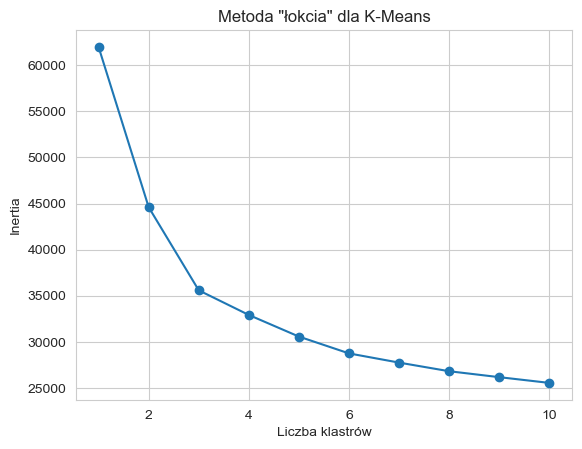

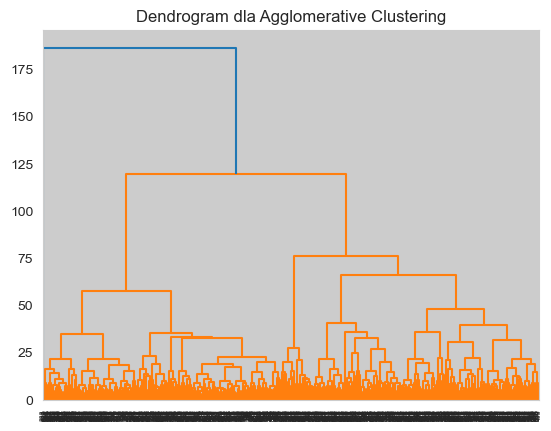

C:\Users\Hanna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hanna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Indeks Silhouette dla K-Means: 0.20818380098022998
Indeks Silhouette dla Agglomerative Clustering: 0.1442367622856484


C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\807019622.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_scaled_sample['KMeans_Cluster'] = kmeans_labels
C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\807019622.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_scaled_sample['Agglo_Cluster'] = agglo_labels
C:\Users\Hanna\AppData\Local\Temp\ipykernel_3348\807019622.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [41]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Standaryzacja danych
scaler = StandardScaler()
X = loan_data_engineered.select_dtypes(include=np.number).values
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled).dropna(axis=1)

# Wybieranie losowej próbki danych, aby zmniejszyć rozmiar zbioru danych
np.random.seed(42)
sample_idx = np.random.choice(X_scaled.shape[0], size=min(1000, X_scaled.shape[0]), replace=False)
X_scaled_sample = X_scaled.iloc[sample_idx]

# Wykres metody "łokcia" dla K-Means
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled_sample)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metoda "łokcia" dla K-Means')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inertia')
plt.show()

# Agglomerative Clustering
# Dendrogram
linked = linkage(X_scaled_sample, 'ward')
dendrogram(linked)
plt.title('Dendrogram dla Agglomerative Clustering')
plt.show()

# DBSCAN - nie wymaga wyboru liczby klastrów, ale trudniejszy do interpretacji
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled_sample)

# Optymalna liczba klastrów i wyniki
optimal_clusters_kmeans = 3  
optimal_clusters_agglo = 3  

kmeans = KMeans(n_clusters=optimal_clusters_kmeans, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_sample)

agglo = AgglomerativeClustering(n_clusters=optimal_clusters_agglo)
agglo_labels = agglo.fit_predict(X_scaled_sample)

# Indeks Silhouette dla oceny jakości klasteryzacji
silhouette_kmeans = silhouette_score(X_scaled_sample, kmeans_labels)
silhouette_agglo = silhouette_score(X_scaled_sample, agglo_labels)

print(f'Indeks Silhouette dla K-Means: {silhouette_kmeans}')
print(f'Indeks Silhouette dla Agglomerative Clustering: {silhouette_agglo}')

# Dodaj etykiety klastrów do oryginalnego DataFrame
X_scaled_sample['KMeans_Cluster'] = kmeans_labels
X_scaled_sample['Agglo_Cluster'] = agglo_labels
X_scaled_sample['DBSCAN_Cluster'] = dbscan_labels

In [42]:
from sklearn.model_selection import train_test_split

X = loan_data_engineered.drop('loan_status', axis=1)
y = loan_data_engineered['loan_status']

In [43]:
X = X.drop(columns=['earliest_cr_line'])

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Zidentyfikowanie kolumn z wartościami tekstowymi
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Obliczenie liczby unikalnych wartości w kolumnach z wartościami tekstowymi
unique_counts = {col: X[col].nunique() for col in non_numeric_columns}

# Wybór kolumn do one-hot encoding, label encoding i do usunięcia
cols_onehot = [col for col, nunique in unique_counts.items() if nunique < 10]
cols_label = [col for col, nunique in unique_counts.items() if 10 <= nunique <= 100]
cols_to_drop = [col for col, nunique in unique_counts.items() if nunique > 100]

# Wykonanie one-hot encoding
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(X[cols_onehot]), columns=onehot_encoder.get_feature_names_out(cols_onehot))

# Wykonanie label encoding
label_encoder = LabelEncoder()
label_encoded = pd.DataFrame()
for col in cols_label:
    common_labels = set(X[col].astype(str))
    transformed_col = X[col].astype(str).apply(lambda x: x if x in common_labels else 'Other')
    label_encoder.fit(transformed_col)
    label_encoded[col] = label_encoder.transform(transformed_col)

# Usunięcie kolumn, które zostaną przekształcone
X = X.drop(columns=cols_onehot + cols_label + cols_to_drop)

# Dodanie kolumn one-hot encoded i label encoded do danych
X = pd.concat([X.reset_index(drop=True), onehot_encoded.reset_index(drop=True), label_encoded.reset_index(drop=True)], axis=1)

# Imputacja brakujących danych
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)


C:\Users\Hanna\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
from sklearn.model_selection import train_test_split

# Podział danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score


# Inicjalizacja modeli
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=1)  # Zmniejszenie liczby wątków dla ograniczonych zasobów
knn_model = KNeighborsClassifier()
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Uproszczony model SVM

# Lista modeli
models = [logistic_model, decision_tree_model, random_forest_model, knn_model, svm_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'k-NN', 'SVM']

# Słownik do przechowywania wyników AUROC
auroc_results = {}

# Trening modeli i obliczenie AUROC
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)  # Trening modelu
    pred_proba = model.predict_proba(X_test)[:, 1]  # Predykcja na zestawie testowym
    auroc = roc_auc_score(y_test, pred_proba)  # Obliczenie AUROC
    auroc_results[name] = auroc  # Zapisanie wyniku

# Wyniki AUROC dla wszystkich modeli
print("AUROC Results:", auroc_results)


C:\Users\Hanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUROC Results: {'Logistic Regression': 1.0, 'Decision Tree': 0.9957232802772046, 'Random Forest': 0.999983477147974, 'k-NN': 0.9294272126238277, 'SVM': 1.0}


Logistic Regression i SVM: Oba te modele uzyskały wynik AUROC równy 1.0, co oznacza doskonałą zdolność do rozróżniania pozytywnych i negatywnych przypadków. To bardzo dobre wyniki i sugerują, że modele te doskonale radzą sobie z danym problemem klasyfikacji.

Decision Tree: Model drzewa decyzyjnego uzyskał wynik AUROC równy 0.9957, co również jest bardzo dobrym wynikiem. Oznacza to, że model ten ma bardzo wysoką zdolność do rozróżniania pozytywnych i negatywnych przypadków.

Random Forest: Model lasu losowego uzyskał wynik AUROC równy 0.9999, co jest praktycznie doskonałym wynikiem. To sugeruje, że model ten bardzo dobrze radzi sobie z zadaniem klasyfikacji.

k-NN (k-Nearest Neighbors): Model k-NN uzyskał wynik AUROC równy 0.9294, co jest nieco niższe w porównaniu do innych modeli. To nadal jest dość dobry wynik, ale oznacza, że ten model może mieć nieco trudności w rozróżnianiu pozytywnych i negatywnych przypadków w porównaniu do innych modeli.

# PCA

In [47]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Wyniki AUROC z poprzednich modeli

# Definicja modeli
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

# Wykonanie PCA
n_components = 10
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Wytrenowanie modeli na danych po PCA i obliczenie AUROC
pca_results = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred_proba_pca = model.predict_proba(X_test_pca)[:, 1]
    roc_auc_pca = roc_auc_score(y_test, y_pred_proba_pca)
    pca_results[name] = roc_auc_pca

# Porównanie wyników
for name in auroc_results.keys():
    print(f"{name}:")
    print(f"Wynik AUROC dla poprzedniego modelu: {auroc_results[name]}")
    print(f"Wynik AUROC po PCA: {pca_results[name]}")


C:\Users\Hanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Wynik AUROC dla poprzedniego modelu: 1.0
Wynik AUROC po PCA: 0.9997480100495804
Decision Tree:
Wynik AUROC dla poprzedniego modelu: 0.9957232802772046
Wynik AUROC po PCA: 0.9820900841691197
Random Forest:
Wynik AUROC dla poprzedniego modelu: 0.999983477147974
Wynik AUROC po PCA: 0.999632745053973
k-NN:
Wynik AUROC dla poprzedniego modelu: 0.9294272126238277
Wynik AUROC po PCA: 0.9284545366814556
SVM:
Wynik AUROC dla poprzedniego modelu: 1.0
Wynik AUROC po PCA: 0.9991315957612499


Moje wyniki pokazują, że w przypadku niektórych modeli wyniki AUROC po PCA są zbliżone do wyników uzyskanych na oryginalnych danych, co sugeruje, że skompresowanie danych za pomocą PCA nie miało dużego wpływu na wydajność tych modeli. Jednak dla innych modeli można zauważyć pewne różnice w wynikach AUROC, co sugeruje, że PCA może mieć wpływ na wydajność tych modeli.

Ogólnie rzecz biorąc, PCA może pomóc w redukcji wymiarowości danych, co może przyspieszyć trenowanie modeli i zmniejszyć ryzyko przetrenowania. Jednak nie zawsze wpływa pozytywnie na wydajność modeli, szczególnie jeśli istnieją ważne cechy w danych, które są utracone w procesie kompresji. 

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Zbalansowanie klas w danych treningowych
X_y_train = pd.concat([pd.DataFrame(X_train), y_train.reset_index(drop=True)], axis=1)
minority_class = X_y_train[X_y_train['loan_status'] == 1]
majority_class = X_y_train[X_y_train['loan_status'] == 0]

minority_upsampled = resample(minority_class, 
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)

upsampled = pd.concat([majority_class, minority_upsampled])
y_train_balanced = upsampled['loan_status']
X_train_balanced = upsampled.drop('loan_status', axis=1)

# Selekcja cech przy użyciu Random Forest
selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
selector.fit(X_train_balanced, y_train_balanced)
X_train_selected = selector.transform(X_train_balanced)
X_test_selected = selector.transform(X_test)

# Ustalenie parametrów dla GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Użycie RandomForestClassifier jako modelu i StratifiedKFold dla kroswalidacji
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Użycie GridSearchCV dla dostrojenia hiperparametrów
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_selected, y_train_balanced)

# Wybór najlepszego modelu
best_model = grid_search.best_estimator_

# Ewaluacja modelu na danych testowych
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]
roc_auc_final = roc_auc_score(y_test, y_pred_proba)

print(f"Final model AUROC score: {roc_auc_final}")
print(f"Best parameters: {grid_search.best_params_}")

# Sprawdzenie, czy AUROC >= 80%
if roc_auc_final >= 0.8:
    print("Finalny model spełnia warunek AUROC >= 80%")
else:
    print("Finalny model nie spełnia warunku AUROC >= 80%")


Final model AUROC score: 0.999681852813381
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100}
Finalny model spełnia warunek AUROC >= 80%
